# Stack Overflow Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline
import time
from matplotlib.pyplot import GridSpec

In [2]:
filename = '/Dataset/2016 Stack Overflow Survey Responses.csv'

In [3]:
# Let's preview dataset
from os import getcwd, listdir, chdir

df = pd.read_csv(getcwd() + filename)
    
print df.shape
print df.head()

(56030, 66)
   Unnamed: 0 collector      country   un_subregion     so_region age_range  \
0        1888  Facebook  Afghanistan  Southern Asia  Central Asia     20-24   
1        4637  Facebook  Afghanistan  Southern Asia  Central Asia     30-34   
2       11164  Facebook  Afghanistan  Southern Asia  Central Asia       NaN   
3       21378  Facebook  Afghanistan  Southern Asia  Central Asia       NaN   
4       30280  Facebook  Afghanistan  Southern Asia  Central Asia      > 60   

   age_midpoint                  gender  \
0          22.0                    Male   
1          32.0                    Male   
2           NaN                     NaN   
3           NaN                  Female   
4          65.0  Prefer not to disclose   

                                 self_identification              occupation  \
0                                         Programmer                     NaN   
1                    Developer; Engineer; Programmer  Mobile developer - iOS   
2             

In [4]:
# I'd like to observe an arbitrary column and analyze the categories within
c = 'occupation'
df[c].groupby(df[c]).count()

occupation
Analyst                                                    570
Back-end web developer                                    6061
Business intelligence or data warehousing expert           392
Data scientist                                             800
Database administrator                                     258
Designer                                                   333
Desktop developer                                         3390
DevOps                                                    1074
Developer with a statistics or mathematics background      960
Embedded application developer                            1268
Engineering manager                                        697
Enterprise level services developer                       1471
Executive (VP of Eng., CTO, CIO, etc.)                     888
Front-end web developer                                   2873
Full-stack web developer                                 13886
Graphics programmer                         

# Understanding the columns and extracting the target columns for predictions

## There are a few things I'd like to do for a general plan:

1 Look at and understand the data

2 Break the dataset into a few mini projects, first starting with one mini project. 

3 Take a few columns as features, and use them for as the target column for each prediction

4 Mine and separate useful data into features to make different predictions:

    prediction 1 will use feature columns A - E
    
    prediction 2 will use feature columns F - P
    
    prediction 3 will use feature columns Q - X
    
4 Find patterns in the data, then trim the dataset as needed to find more patterns in the data

5 Make predictions, such as predict if a person is looking for a new job, and contact them.


example columns to use for the first prediction: 
'open_to_new_job', 'open_to_new_job', 'new_job_value', 'agree_loveboss', 'important_variety', 'important_newtech'

I'd like to understand more about the people who are currently working. Can we determine groups of people and their personalities, based on the importance of the workplace questions? From there, can we determine if those different types of people are looking for a new job? Can an ideal company be created to optimize worker happiness (of course, there are tradeoffs)?

By looking at the columns, I'll choose features that I think are important and list the reasons alongside them.
'age_range'           - does age determine if the person is looking for a                         new job?
'experience_range'    - does their level of experience encourage them to                           hop around to different companies?
'programming_ability' - this is not just a measure of their perceived                             ability but also a measure of their confidence 
'agree_loveboss'      - can they tolerate their bosses easily
'important_variety'   - would they rather switch roles often or do they                           prefer to stay with a specialty
'important_control'   - i hypothesize that this relates to b
'important_promotion' - do they care about promotions? i know some would                           rather be coding
'important_newtech'   - 
'important_companymission' - do they care about this much?
'important_buildexisting' - i think this would be the opposite of working                             with a variety of projects
'important_buildnew'  - build new?
'important_wfh'       - would this really matter?
'developer_challenges'- are there certain things that developers could do                         without?
'new_job_value'       - important about new employment opportunity, this                           is important to know
'tech_want'           - 
'education'           - 
'industry'            - 
'agree_notice'        - this shows how some brains work
'agree_nightcode'     - because these guys are a different type of animal
'occupation'          - 

I'm going to combine these to create a new dataframe then use the .dropna() function to remove unnecessary data to see if the data isn't reduced down too much.

From there, we will use PCA for feature extraction in order to focus on the really important ones

Process:
• Combine data into one DataFrame
• drop entries and columns with too many NaN values
• features: expand certain features
• label: vectorize the entries

In [5]:
# Combine all columns into one dataframe
work_xp = ['age_range', 'experience_range', 'programming_ability', 'agree_loveboss',
           'important_variety', 'important_control', 'important_promotion',
           'important_newtech', 'important_companymission', 'important_buildexisting',
           'important_buildnew', 'important_wfh', 'developer_challenges',
           'new_job_value', 'education', 'occupation', 'open_to_new_job']

# create a dataframe template
work_xp_df = pd.DataFrame(index=df.index)

# combine the selected columns into the new dataframe
for col in work_xp:
    work_xp_df = pd.concat([work_xp_df, df[col]], axis=1)
    
original = work_xp_df
original_shape = work_xp_df.shape # shape before dropping NaN entries


# # NaN values

use KNN to fill in the missing NaN values
5620 rows have only 1 NaN value
666, 2
and 115, 3

If the row has less than 4 NaN entries, find its 5 nearest neighbors
For each of the NaN entries, get a majority vote of the nearest neighbors
If there is no majority vote then choose the mean of the entire dataset


In [6]:
# remove rows with more than 3 NaN entries
work_xp_df = work_xp_df.dropna(thresh=(min(*work_xp_df.shape) - 3))

reduced = work_xp_df.shape # shape after dropping NaN entries
# equation to calculate the percent change
percent_change = float((original_shape[0] - reduced[0])) / float(original_shape[0]) * 100
print "Using the .dropna() function reduces the data by {:.2f}% to these dimensions {}\n".format(percent_change, reduced)

print "Number of NaN entries per column: "
for col in original:
    print col, pd.isnull(original[col]).sum()

# I'd like to come back to this, and see if the ML algos can use this dataset with NaN values
work_xp_df

Using the .dropna() function reduces the data by 23.97% to these dimensions (42598, 17)

Number of NaN entries per column: 
age_range 303
experience_range 6510
programming_ability 9048
agree_loveboss 13934
important_variety 13402
important_control 13458
important_promotion 13547
important_newtech 13426
important_companymission 13501
important_buildexisting 13450
important_buildnew 13492
important_wfh 13448
developer_challenges 14934
new_job_value 12372
education 11075
occupation 6511
open_to_new_job 11650


,age_range,experience_range,programming_ability,agree_loveboss,important_variety,important_control,important_promotion,important_newtech,important_companymission,important_buildexisting,important_buildnew,important_wfh,developer_challenges,new_job_value,education,occupation,open_to_new_job
1,30-34,6 - 10 years,7.0,Agree somewhat,This is very important,This is very important,This is somewhat important,This is very important,This is somewhat important,I don't care about this,This is very important,I don't care about this,Unrealistic expectations; Interacting with non...,Salary; Ability to make or influence important...,I'm self-taught; On-the-job training; B.S. in ...,Mobile developer - iOS,I am not interested in new job opportunities
3,NaN,11+ years,8.0,Disagree completely,This is somewhat important,I don't care about this,I don't care about this,This is somewhat important,I don't care about this,This is very important,This is very important,This is very important,Corporate policies; Interacting with non-techn...,Office location; Remote working option; Flexib...,I'm self-taught; On-the-job training,DevOps,"I'm not actively looking, but I am open to new..."
7,25-29,1 - 2 years,7.0,Agree completely,This is very important,This is very important,This is very important,This is very important,This is very important,This is very important,This is very important,I don't care about this,Non-technical management; Poor infrastructure ...,Salary; Company size; Job title,B.S. in Computer Science (or related field),Back-end web developer,"I'm not actively looking, but I am open to new..."
9,20-24,1 - 2 years,3.0,Neutral,This is very important,This is somewhat important,This is very important,This is very important,This is somewhat important,This is somewhat important,This is very important,This is somewhat important,Poor documentation,Tech stack; Opportunity for advancement,I'm self-taught; On-the-job training; Online c...,Back-end web developer,"I'm not actively looking, but I am open to new..."
11,20-24,6 - 10 years,9.0,Agree completely,This is somewhat important,This is very important,This is very important,This is very important,This is very important,This is somewhat important,This is very important,This is somewhat important,Poor team dynamics; Inefficient development pr...,Salary; Company stage; Work/life balance; Oppo...,"I'm self-taught; Online class (e.g. Coursera, ...",Full-stack web developer,"I'm not actively looking, but I am open to new..."
12,25-29,6 - 10 years,7.0,Neutral,This is somewhat important,This is very important,This is very important,This is very important,This is very important,This is somewhat important,This is very important,This is somewhat important,Poor scheduling; Interacting with stupid peopl...,Salary; Opportunity for advancement; Job title,B.S. in Computer Science (or related field),Full-stack web developer,I am actively looking for a new job
13,25-29,6 - 10 years,8.0,Disagree somewhat,This is somewhat important,This is somewhat important,This is somewhat important,This is very important,This is somewhat important,This is somewhat important,This is very important,This is somewhat important,Poor team dynamics; Inefficient development pr...,Salary; Company size; Company financials; Work...,I'm self-taught; On-the-job training; Masters ...,Back-end web developer,I am actively looking for a new job
14,20-24,1 - 2 years,7.0,Agree completely,I don't care about this,This is very important,This is very important,This is very important,This is very important,This is very important,This is very important,This is very important,Trying to be nice,Salary; Equity; Ability to make or influence i...,I'm self-taught; On-the-job training,Back-end web developer,I am not interested in new job opportunities
19,25-29,6 - 10 years,9.0,Neutral,This is somewhat important,This is somewhat important,This is very important,This is somewhat important,This is very important,This is very important,This is very important,This is somewha

In [7]:
# Analyzing each row's number of NaN entries
from sklearn.preprocessing import Imputer

count = {}

for row, data in work_xp_df.iterrows():
    no_nan = data.isnull().sum()
    
#     if no_nan > 3:
#         print no_nan
    
    if no_nan in count:
        count[no_nan] += 1
    else:
        count[no_nan] = 1
        
for i, j in count.iteritems():
    print "{} rows have {} NaN values".format(j, i)

36197 rows have 0 NaN values
5620 rows have 1 NaN values
666 rows have 2 NaN values
115 rows have 3 NaN values


## Here are the results of the number of NaN entries per column

I went back and changed the thresh parameter on the dropna() function to 3. 

36197 rows have 0 NaN values
5620 rows have 1 NaN values
666 rows have 2 NaN values
115 rows have 3 NaN values
46 rows have 4 NaN values
29 rows have 5 NaN values
22 rows have 6 NaN values
29 rows have 7 NaN values
41 rows have 8 NaN values
196 rows have 9 NaN values
1243 rows have 10 NaN values
287 rows have 11 NaN values
950 rows have 12 NaN values
3884 rows have 13 NaN values
422 rows have 14 NaN values
77 rows have 15 NaN values
6036 rows have 16 NaN values
170 rows have 17 NaN values

In [8]:
# Analyzing the number of NaN values per column
i = 1
for col, data in original.iteritems():
    print "Column {}:\n\t\t\t\t\t{}".format(col, data.isnull().sum())
    i += 1

Column age_range:
					303
Column experience_range:
					6510
Column programming_ability:
					9048
Column agree_loveboss:
					13934
Column important_variety:
					13402
Column important_control:
					13458
Column important_promotion:
					13547
Column important_newtech:
					13426
Column important_companymission:
					13501
Column important_buildexisting:
					13450
Column important_buildnew:
					13492
Column important_wfh:
					13448
Column developer_challenges:
					14934
Column new_job_value:
					12372
Column education:
					11075
Column occupation:
					6511
Column open_to_new_job:
					11650


In [9]:
# this updates the indices
work_xp_df.index = range(1, max(*work_xp_df.shape)+1)
work_xp_df

,age_range,experience_range,programming_ability,agree_loveboss,important_variety,important_control,important_promotion,important_newtech,important_companymission,important_buildexisting,important_buildnew,important_wfh,developer_challenges,new_job_value,education,occupation,open_to_new_job
1,30-34,6 - 10 years,7.0,Agree somewhat,This is very important,This is very important,This is somewhat important,This is very important,This is somewhat important,I don't care about this,This is very important,I don't care about this,Unrealistic expectations; Interacting with non...,Salary; Ability to make or influence important...,I'm self-taught; On-the-job training; B.S. in ...,Mobile developer - iOS,I am not interested in new job opportunities
2,NaN,11+ years,8.0,Disagree completely,This is somewhat important,I don't care about this,I don't care about this,This is somewhat important,I don't care about this,This is very important,This is very important,This is very important,Corporate policies; Interacting with non-techn...,Office location; Remote working option; Flexib...,I'm self-taught; On-the-job training,DevOps,"I'm not actively looking, but I am open to new..."
3,25-29,1 - 2 years,7.0,Agree completely,This is very important,This is very important,This is very important,This is very important,This is very important,This is very important,This is very important,I don't care about this,Non-technical management; Poor infrastructure ...,Salary; Company size; Job title,B.S. in Computer Science (or related field),Back-end web developer,"I'm not actively looking, but I am open to new..."
4,20-24,1 - 2 years,3.0,Neutral,This is very important,This is somewhat important,This is very important,This is very important,This is somewhat important,This is somewhat important,This is very important,This is somewhat important,Poor documentation,Tech stack; Opportunity for advancement,I'm self-taught; On-the-job training; Online c...,Back-end web developer,"I'm not actively looking, but I am open to new..."
5,20-24,6 - 10 years,9.0,Agree completely,This is somewhat important,This is very important,This is very important,This is very important,This is very important,This is somewhat important,This is very important,This is somewhat important,Poor team dynamics; Inefficient development pr...,Salary; Company stage; Work/life balance; Oppo...,"I'm self-taught; Online class (e.g. Coursera, ...",Full-stack web developer,"I'm not actively looking, but I am open to new..."
6,25-29,6 - 10 years,7.0,Neutral,This is somewhat important,This is very important,This is very important,This is very important,This is very important,This is somewhat important,This is very important,This is somewhat important,Poor scheduling; Interacting with stupid peopl...,Salary; Opportunity for advancement; Job title,B.S. in Computer Science (or related field),Full-stack web developer,I am actively looking for a new job
7,25-29,6 - 10 years,8.0,Disagree somewhat,This is somewhat important,This is somewhat important,This is somewhat important,This is very important,This is somewhat important,This is somewhat important,This is very important,This is somewhat important,Poor team dynamics; Inefficient development pr...,Salary; Company size; Company financials; Work...,I'm self-taught; On-the-job training; Masters ...,Back-end web developer,I am actively looking for a new job
8,20-24,1 - 2 years,7.0,Agree completely,I don't care about this,This is very important,This is very important,This is very important,This is very important,This is very important,This is very important,This is very important,Trying to be nice,Salary; Equity; Ability to make or influence i...,I'm self-taught; On-the-job training,Back-end web developer,I am not interested in new job opportunities
9,25-29,6 - 10 years,9.0,Neutral,This is somewhat important,This is somewhat important,This is very important,This is somewhat important,This is very important,This is very important,This is very important,This is somewhat imp

# Next, split columns into features and label columns

In [10]:
# dataset of the features
feature_cols = work_xp_df.columns[:min(*work_xp_df.shape) - 1]
# dataset of the label column
label_col = work_xp_df.columns[-1]

print work_xp_df[label_col].groupby(work_xp_df[label_col]).count()

print feature_cols

open_to_new_job
I am actively looking for a new job                              6569
I am not interested in new job opportunities                     9112
I'm not actively looking, but I am open to new opportunities    26792
dtype: int64
Index([u'age_range', u'experience_range', u'programming_ability',
       u'agree_loveboss', u'important_variety', u'important_control',
       u'important_promotion', u'important_newtech',
       u'important_companymission', u'important_buildexisting',
       u'important_buildnew', u'important_wfh', u'developer_challenges',
       u'new_job_value', u'education', u'occupation'],
      dtype='object')


# The columns need to be vectorized and normalized, since they are currently formatted into categories, objects, and strings

The label column has three entries: [“I am not interested in new job opportunities”, “I’m not actively looking, but I am open to new opportunities”, “I am actively looking for a new job”]. I'd have to convert "I am not interested in new job opportunities" to have a value of 0 and the other two entries to a value of 1.

The feature columns are more complicated, since each are formatted differently. The features need to be categorized into different groups, based on how they need to be vectorized. Then we need to call a function on each of those groups to get the DataFrame's final desired format.

One challenge I'm thinking of is that the vectorized columns are unable to be inverse-transformed, meaning once ['red', 'white', 'blue'] is turned into [0, 1, 2], will we need to label the vectors ['red', 'white', 'blue'] for identifying the entries in the column.

open_to_new_job    125
dtype: int64


In [12]:
# before vectorizing the feature columns, we'll take a look at how all of them are formatted
features = work_xp_df[feature_cols]

print features[features.columns[0:5]]
print features.education

      age_range  experience_range  programming_ability       agree_loveboss  \
1         30-34      6 - 10 years                  7.0       Agree somewhat   
2           NaN         11+ years                  8.0  Disagree completely   
3         25-29       1 - 2 years                  7.0     Agree completely   
4         20-24       1 - 2 years                  3.0              Neutral   
5         20-24      6 - 10 years                  9.0     Agree completely   
6         25-29      6 - 10 years                  7.0              Neutral   
7         25-29      6 - 10 years                  8.0    Disagree somewhat   
8         20-24       1 - 2 years                  7.0     Agree completely   
9         25-29      6 - 10 years                  9.0              Neutral   
10        20-24       2 - 5 years                  6.0     Agree completely   
11        20-24       2 - 5 years                  9.0     Agree completely   
12         < 20  Less than 1 year                  4

age_range: the age_range needs to be vectorize

experience_range: vectorize

programming_ability: vectorize

agree_loveboss: vectorize

important_variety: vectorize

important_contro: vectorize

important_companymission: vectorize

important_buildexisting: vectorize

important_buildnew: vectorize

important_wfh: vectorize

developer_challenges: convert to binary columns

new_job_value: convert to binary columns

education: convert to binary columns

occupation: vectorize

## the columns that need to be vectorized are converting the entries to numbers range(0, n)
## the columns that need to be converted to binary columns have multiple answers

We'll create two functions for these two groups

In [13]:
# this is a list of all the columns that need to be broken down further
large_columns = ["developer_challenges", "new_job_value", "education"]

In [111]:
# convert NaN values to -1
work_xp_df = work_xp_df.fillna(value=-1)

Index([u'age_range', u'experience_range', u'programming_ability',
       u'agree_loveboss', u'important_variety', u'important_control',
       u'important_promotion', u'important_newtech',
       u'important_companymission', u'important_buildexisting',
       u'important_buildnew', u'important_wfh', u'developer_challenges',
       u'new_job_value', u'education', u'occupation', u'open_to_new_job'],
      dtype='object')

In [165]:
# converting all text and categorical data into numerical data

# this function uses the LabelEncoder() to convert entries into numeric values
def vectorize_data(df, col):
    # bug: dataframe entry is shifted
    le = LabelEncoder()
    le.fit(df[col])
    vectorized = le.transform(df[col])
    
    # need to shift data, so the first index is 1, not 0
    return pd.DataFrame(vectorized, columns=[col], index=range(0, max(*df.shape)))


# NaN values == -1 and vectorizes categorical data
def vectorize_data2(df, col):
    # first create the mapper
    mapper = {}
    counter = 0
    
    for idx, entry in df[col].iteritems():
        if entry == -1 and entry not in mapper:
            mapper[entry] = entry
        elif entry not in mapper:
            mapper[entry] = counter
            counter += 1
            
    return pd.DataFrame(df[col].map(mapper), index=range(1, max(*df.shape)+1))


# this function splits the multiple answers into all columns and inputs binary entries
def convert_to_binary_columns(df, column_name):
    a = df[column_name].str.get_dummies(sep='; ')
    if "-1" in a.columns:
        del a["-1"]
    return a


# this main function uses the converters above to transform the entire dataset
def main_transform_columns(df):
    outX = pd.DataFrame(index=df.index)
    binary = ["developer_challenges", "new_job_value", "education"]
    
    for col in df.columns:
        if work_xp_df[col].dtype == float:
            outX = outX.join(df[col].fillna(-1))
        elif col in binary:
            expanded_col = convert_to_binary_columns(df, col)
            outX = outX.join(expanded_col)
        else:
            vec_col = vectorize_data2(df, col)
            outX = outX.join(vec_col)
            
    return outX
    

# fillna for features
fillna_features = main_transform_columns(work_xp_df[work_xp_df.columns[:-1]])

#fillna for label
label = label.fillna(-1)

In [166]:
# checking if NaN values are filled
label.isnull().sum()

open_to_new_job    0
dtype: int64

In [167]:
fillna_df = pd.concat([fillna_features, label], axis=1)

In [168]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from math import isnan
from scipy import stats

# fill in -1 values, using KNN
def fill_nan(df):
    # df must already be vectorized
    
    five_neighbors = NearestNeighbors(n_neighbors=5)
    five_neighbors.fit(df)
    
    # iterate through the rows
    for row, data in df.iterrows(): # Series
        # counts the number of NaN values
        no_of_nan = df.iloc[row - 1][df.iloc[row - 1] == -1].count()
        counter = 0
        
        if no_of_nan > 0:
            print row
            # collect the 5 nearest neighbors
            dist, n_indices = five_neighbors.kneighbors(df.iloc[row])
                    
            ### Implement Imputer here ###
            # 1 find the column number of the NaN entry
            while counter < no_of_nan:
                for col_name, v in data.iteritems():
#                     DEBUGGER:
#                     print "counter {}".format(counter)
#                     print "row {}".format(row)
#                     print "column {}".format(i)
#                     print "no_of_nan {}".format(no_of_nan)
#                     print "v {}".format(v)
#                     DEBUGGER
                    
                    if int(v) == -1:
                        counter += 1
                        # row enumeration starts with 1
                        neighbors_mode = stats.mode(df[col_name].iloc[n_indices[0]])[0][0]
                        df.set_value(row, col_name, neighbors_mode)
                        
        # used for observing running speed here
        if row % 10 == 0: print row
                    
    return df

a = time.time()
cleaned_df = fill_nan(fillna_df)
run_time = time.time() - a

2
10
20
20
30
31
34
40
48
49
50
55
60
70
80
90
100
110
111
120
124
130
135
139
140
150


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

160
166
170
171
173
177
179
180
190
200
207
210
220
221
230
231
239
240
250
260
268
270
280
290
300


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

310
320
325
330
335
340
343
344
348
349
350
360
363
368
370
380
384
390
400
410
420
426
430
440
450
460
470


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

480
490
496
500
510
520
530
536
540
540
550
560
570
580
584
590
598
600
600
610
620
630
640
650
660


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

660
670
680
690
700
701
710
720
729
730
730
735
740
750
760
770
770
780
782
790
798
800
807
810
818
820


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

830
840
840
850
850
860
865
870
873
880
884
888
890
894
900
910
920
930
937
939
940
943
949
950
960


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

968
970
980
984
990
1000
1001
1006
1010
1014
1018
1020
1023
1030
1030
1040
1047
1050
1054
1060
1070
1080
1090
1100
1110


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

1120
1127
1130
1140
1150
1160
1168
1170
1171
1180
1182
1190
1200
1210
1212
1218
1220
1223
1230
1240
1246
1248
1250
1260
1268
1270
1275


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

1280
1290
1300
1310
1320
1330
1340
1350
1352
1359
1360
1360
1365
1370
1370
1380
1382
1386
1388
1390
1393
1400
1407
1410
1417


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

1420
1430
1431
1440
1450
1460
1470
1472
1480
1489
1490
1500
1510
1520
1530
1540
1550
1553
1555
1560
1566
1570
1580
1588
1590


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

1600
1610
1620
1626
1630
1639
1640
1650
1660
1661
1668
1670
1680
1690
1700
1709
1710
1717
1720
1730
1740
1750
1760


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

1770
1780
1790
1800
1802
1810
1820
1830
1840
1849
1850
1851
1860
1870
1880
1890
1900
1910
1920
1922
1930


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

1932
1940
1950
1952
1960
1961
1967
1970
1980
1990
2000
2010
2020
2030
2039
2040
2050
2060
2068
2070
2071


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

2080
2090
2097
2100
2110
2111
2120
2130
2137
2140
2143
2150
2160
2170
2177
2180
2183
2190
2200
2200
2210
2220
2223
2225
2227


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

2230
2240
2250
2260
2270
2270
2280
2290
2292
2300
2310
2315
2320
2320
2324
2330
2336
2340
2350
2360
2370
2380
2387


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

2390
2396
2400
2401
2410
2415
2416
2420
2429
2430
2434
2440
2450
2460
2470
2480
2484
2490
2493
2500
2502
2510
2515
2520
2525


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

2530
2535
2540
2550
2552
2557
2560
2570
2580
2590
2600
2610
2613
2620
2630
2640
2650
2660
2662
2670
2673
2680
2690
2690


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

2700
2710
2720
2730
2740
2750
2760
2770
2780
2784
2790
2800
2810
2820
2830
2840
2843
2850
2860
2863
2870
2878
2880
2890


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

2900
2910
2920
2930
2940
2950
2960
2970
2980
2982
2990
2992
2999
3000
3010
3020
3030
3031
3040
3042
3050


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

3060
3066
3070
3080
3090
3090
3100
3106
3110
3120
3130
3133
3140
3141
3150
3154
3155
3160
3167
3168
3170
3180
3190
3191
3200
3210
3220


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

3230
3240
3250
3260
3265
3270
3280
3290
3300
3305
3310
3320
3330
3340
3350
3355
3356
3360
3368
3370
3380
3383
3390
3400
3410
3419


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

3420
3421
3430
3440
3450
3450
3460
3470
3477
3480
3490
3500
3510
3520
3530
3540
3550
3560
3570
3580
3590
3600


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

3600
3605
3610
3620
3630
3637
3640
3647
3650
3660
3670
3680
3690
3700
3710
3720
3730
3740
3746
3750
3760
3770
3780
3790
3800
3803
3810
3816
3820
3823
3830
3834
3840
3845
3850
3860
3864
3867
3870
3874
3880
3890
3900
3910
3920
3921
3930
3940
3950
3952
3958


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

3960
3970
3980
3990
4000
4006
4010
4020
4021
4022
4030
4040
4050
4050
4055
4060
4061
4064
4070
4080
4090
4100
4110
4116
4120


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

4130
4131
4140
4150
4150
4160
4162
4170
4180
4190
4197
4200
4210
4220
4223
4230
4236
4240
4241
4250
4260
4260
4270
4280


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

4290
4300
4310
4314
4320
4328
4330
4340
4350
4353
4360
4364
4370
4379
4380
4387
4390
4398
4400
4401
4410
4420
4421
4430
4434
4440
4450


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

4460
4470
4471
4480
4490
4492
4500
4505
4510
4520
4526
4530
4538
4540
4550
4560
4569
4570
4580
4580
4583
4590
4590
4600
4610


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

4620
4621
4630
4633
4639
4640
4650
4660
4670
4680
4682
4690
4700
4710
4720
4721
4725
4730
4740
4750
4760
4764
4765
4770
4776
4777


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

4778
4780
4790
4800
4810
4820
4825
4830
4840
4850
4856
4860
4870
4880
4889
4890
4898
4900
4901
4905
4910
4910
4920
4925


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

4929
4930
4931
4940
4950
4950
4955
4960
4970
4974
4980
4990
5000
5008
5010
5020
5030
5040
5046
5050
5060
5062
5066
5068


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

5070
5071
5080
5090
5100
5110
5120
5123
5130
5140
5144
5150
5160
5167
5170
5180
5190
5195
5200
5210
5220
5226
5230


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

5235
5240
5250
5256
5260
5270
5273
5280
5286
5287
5290
5300
5305
5310
5320
5330
5340
5350
5360
5369
5370
5380
5390


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

5400
5401
5410
5420
5425
5430
5433
5440
5444
5450
5460
5470
5475
5480
5483
5488
5490
5494
5500
5501
5510
5514
5520
5522
5530
5540


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

5550
5560
5570
5572
5577
5580
5590
5600
5610
5613
5620
5630
5633
5640
5642
5650
5660
5662
5666
5670
5677
5680
5685
5689
5690
5690


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

5700
5710
5720
5730
5739
5740
5750
5757
5760
5763
5770
5780
5787
5790
5794
5800
5810
5813
5818
5820
5830
5834
5840
5850
5850
5860
5865


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

5870
5880
5886
5890
5893
5900
5910
5920
5930
5939
5940
5943
5950
5958
5960
5970
5972
5975
5980
5987
5990
6000
6006
6010


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

6020
6023
6030
6040
6050
6050
6060
6062
6070
6080
6090
6100
6110
6117
6120
6120
6130
6140
6147
6150
6160
6170
6170
6180
6182


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

6186
6188
6190
6198
6200
6204
6210
6220
6226
6230
6231
6240
6240
6250
6260
6270
6276
6280
6290
6300
6310
6310
6320
6330


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

6340
6350
6352
6360
6369
6370
6380
6390
6390
6391
6400
6402
6410
6412
6414
6420
6430
6440
6450
6453
6460
6470
6473
6480


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

6490
6500
6510
6512
6520
6524
6525
6529
6530
6540
6550
6560
6570
6580
6590
6600
6610
6620
6630
6640
6644
6648
6650


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

6659
6660
6670
6680
6690
6700
6709
6710
6720
6724
6730
6740
6750
6760
6762
6770
6780
6790
6800
6802
6810
6810
6816


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

6820
6830
6836
6840
6847
6850
6860
6870
6880
6890
6890
6891
6900
6910
6920
6930
6936
6940
6946
6950
6951
6954
6960
6970
6980


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

6980
6984
6989
6990
6990
7000
7004
7010
7015
7020
7030
7040
7050
7050
7060
7070
7079
7080
7090
7098
7100
7110
7117
7120
7122
7130
7133


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

7140
7144
7146
7150
7159
7160
7160
7161
7170
7171
7179
7180
7181
7187
7190
7200
7205
7210
7220
7230
7231
7240
7244
7246
7250
7260
7270
7280
7290
7300
7310
7320
7320
7328
7330
7340
7347
7350
7360
7370
7380
7390
7392
7400
7410
7411
7414
7415
7417
7419
7420
7430


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

7440
7440
7450
7451
7460
7463
7468
7470
7480
7488
7490
7490
7500
7508
7510
7520
7530
7540
7550
7560
7565
7570
7570
7571
7576
7580


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

7590
7593
7600
7610
7620
7630
7639
7640
7650
7660
7670
7675
7680
7687
7690
7700
7701
7710
7714
7717
7720
7724
7730
7733


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

7738
7740
7750
7754
7755
7760
7762
7770
7779
7780
7786
7790
7800
7804
7806
7810
7810
7820
7827
7830
7838
7840
7850
7850


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

7860
7870
7880
7890
7891
7900
7903
7910
7920
7928
7930
7930
7931
7940
7950
7960
7970
7976
7980
7981
7990
8000
8010
8012


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

8018
8020
8030
8034
8040
8050
8060
8064
8070
8078
8080
8088
8090
8100
8102
8110
8116
8119
8120
8130
8132
8140
8142
8150
8160
8161


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

8165
8170
8175
8180
8180
8190
8190
8200
8210
8220
8229
8230
8238
8240
8250
8260
8266
8270
8280
8290
8292
8300
8310
8311


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

8314
8320
8324
8330
8339
8340
8350
8354
8357
8360
8370
8370
8372
8380
8380
8384
8390
8394
8396
8399
8400
8409
8410
8413
8420
8430


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

8440
8450
8460
8461
8470
8471
8479
8480
8483
8490
8500
8500
8501
8505
8510
8520
8524
8530
8531
8538
8540
8542
8550
8560
8561


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

8570
8572
8579
8580
8590
8600
8610
8611
8617
8620
8630
8637
8640
8645
8650
8660
8670
8680
8680
8685
8690
8699
8700


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

8709
8710
8715
8720
8728
8730
8734
8740
8745
8750
8756
8760
8760
8770
8780
8785
8790
8800
8801
8810
8820
8830
8840


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

8850
8850
8855
8860
8861
8863
8864
8870
8874
8879
8880
8890
8898
8900
8910
8917
8920
8930
8931
8940
8944
8950
8960
8970


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

8980
8990
9000
9001
9004
9006
9010
9012
9020
9030
9032
9040
9050
9060
9070
9070
9072
9073
9075
9078
9079
9080
9088
9090
9100
9102


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

9110
9120
9130
9135
9140
9140
9149
9150
9160
9170
9175
9179
9180
9190
9200
9210
9220
9230
9235
9240
9250
9259


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

9260
9270
9275
9280
9281
9283
9284
9290
9296
9300
9310
9311
9317
9320
9330
9339
9340
9350
9354
9360
9370
9379
9380
9390
9391
9393


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

9399
9400
9401
9404
9410
9420
9430
9439
9440
9441
9445
9450
9453
9460
9466
9467
9470
9480
9485
9489
9490
9497
9500
9510
9511
9520
9530
9533
9539
9540
9540
9550
9560
9570
9580
9590
9600
9610
9613
9620
9620
9630
9630
9634
9636
9638
9640
9650
9660
9664
9670
9680
9681
9690


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

9700
9703
9710
9720
9730
9740
9748
9750
9760
9761
9770
9780
9786
9790
9794
9800
9810
9816
9817
9820
9828
9830
9840
9849
9850
9860
9867


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

9870
9870
9874
9880
9881
9890
9900
9910
9916
9917
9920
9921
9930
9940
9950
9960
9962
9970
9980
9988
9990
10000
10008
10010
10020
10028
10030


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

10040
10050
10060
10065
10070
10080
10090
10100
10110
10115
10120
10123
10124
10130
10140
10146
10150
10160
10163
10170
10175
10178
10180
10184
10190
10200
10206


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

10210
10216
10220
10230
10237
10240
10241
10242
10249
10250
10260
10269
10270
10280
10282
10290
10300
10310
10320
10330
10340


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

10350
10350
10360
10370
10373
10380
10390
10400
10410
10420
10429
10430
10440
10445
10450
10451
10455
10460
10470
10480


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

10490
10498
10500
10510
10520
10521
10527
10530
10540
10546
10550
10560
10560
10569
10570
10580
10590
10600
10605
10607
10610
10620


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

10630
10640
10650
10660
10670
10680
10690
10697
10700
10710
10714
10720
10730
10737
10740
10746
10750
10758
10760
10769
10770


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

10780
10781
10789
10790
10800
10810
10820
10829
10830
10836
10840
10847
10850
10851
10860
10870
10875
10880
10890
10900
10910
10910
10917
10920
10924
10930
10931


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

10932
10940
10950
10960
10970
10979
10980
10990
11000
11002
11010
11020
11030
11040
11050
11052
11060
11063
11070
11072


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

11080
11080
11088
11090
11100
11110
11111
11120
11121
11129
11130
11131
11140
11143
11150
11153
11157
11160
11164
11168
11170
11180
11181
11182
11190
11200
11205


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

11210
11218
11220
11230
11231
11240
11250
11260
11270
11280
11283
11290
11290
11291
11300
11310
11320
11327
11330
11340
11350
11360


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

11370
11372
11380
11390
11400
11410
11418
11420
11420
11430
11439
11440
11446
11450
11460
11462
11466
11469
11470
11480
11490
11493
11500
11504
11510
11510


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

11520
11530
11540
11541
11550
11553
11560
11569
11570
11580
11590
11592
11600
11605
11609
11610
11620
11627
11630
11640
11643
11645
11650
11656
11660


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

11670
11670
11675
11676
11680
11690
11700
11710
11714
11720
11730
11740
11748
11750
11760
11766
11770
11780
11784
11790
11800
11805
11810
11820


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

11830
11835
11838
11840
11850
11853
11860
11867
11870
11880
11882
11884
11890
11893
11896
11900
11907
11910
11920
11927
11930
11940
11950
11960
11970


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

11979
11980
11982
11984
11990
11991
11993
11997
12000
12007
12010
12014
12017
12019
12020
12030
12040
12050
12060
12068
12070
12080
12090
12100
12110


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

12110
12118
12119
12120
12120
12121
12122
12123
12124
12130
12132
12133
12137
12140
12150
12157
12160
12170
12180
12184
12190
12200
12210
12220
12230
12234
12240
12250
12260


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

12270
12270
12276
12280
12290
12300
12310
12320
12330
12340
12350
12360
12370
12372
12376
12380
12390
12393
12397
12400
12410
12411
12420
12428


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

12430
12431
12440
12446
12450
12460
12470
12480
12490
12500
12510
12520
12522
12530
12540
12549
12550
12560
12570
12580
12590
12600
12605
12610
12616
12620
12630
12635
12638
12640
12640
12641
12642
12643
12644
12645
12646
12647
12648
12649
12650
12650
12651
12652
12653
12654
12655
12656
12657
12658
12659
12660
12660
12661
12662
12663
12664
12665
12666
12667
12668
12669
12670
12670
12671
12672
12673
12674
12675
12676
12677
12678
12679
12680
12680
12681
12682
12683
12684
12685
12686
12687


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

12688
12689
12690
12690
12691
12692
12693
12694
12695
12696
12697
12700
12700
12709
12710
12720
12729
12730
12740
12750
12754
12758
12760
12761
12770
12778
12780
12787
12789
12790
12799
12800
12803
12808
12810
12819


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

12820
12830
12840
12847
12850
12854
12860
12870
12878
12880
12883
12885
12887
12889
12890
12890
12891
12892
12893
12895
12896
12897
12898
12899
12900
12900
12901
12902
12903
12904
12905
12906
12910
12913
12920
12922
12930
12935


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

12940
12950
12960
12960
12970
12972
12979
12980
12980
12982
12990
13000
13010
13020
13023
13027
13030
13033
13040
13050
13060
13061
13065
13070
13075


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

13076
13080
13090
13097
13099
13100
13110
13120
13130
13140
13150
13160
13168
13170
13171
13175
13180
13187
13190
13197
13200


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

13210
13220
13230
13240
13248
13250
13252
13260
13261
13262
13263
13264
13265
13266
13267
13268
13269
13270
13270
13271
13272
13273
13274
13275
13276
13278
13279
13280
13280
13281
13282
13283
13284
13285
13290
13294
13300
13302
13310
13313
13320
13330
13340


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

13350
13360
13370
13373
13377
13380
13388
13390
13390
13400
13405
13410
13420
13430
13440
13450
13450
13460
13465
13470
13480
13486
13490
13500
13508


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

13510
13519
13520
13530
13540
13550
13560
13570
13580
13590
13600
13610
13620
13630
13640
13650
13660
13666
13670
13671
13680
13690
13690
13700
13710
13720
13730
13731
13733
13734
13735
13736
13737
13738
13739
13740
13740
13741
13742
13743
13744
13745
13746
13747
13748
13749
13750
13750
13751
13752
13753
13754
13755
13756
13757
13758
13759
13760
13760
13761
13762
13763
13769
13770
13774


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

13780
13788
13790
13794
13800
13805
13810
13820
13830
13840
13850
13860
13860
13861
13862
13863
13864
13870
13880
13888
13890
13896
13900
13908
13910


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

13920
13930
13940
13942
13950
13960
13969
13970
13980
13990
14000
14009
14010
14018
14020
14030
14040
14046
14050
14060
14070
14073
14080
14080


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

14090
14099
14100
14110
14120
14121
14130
14139
14140
14150
14160
14168
14170
14173
14180
14189
14190
14194
14195
14200
14200
14210
14220


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

14230
14237
14240
14250
14253
14260
14270
14280
14290
14293
14300
14304
14310
14313
14320
14325
14328
14330
14334
14340
14342
14350
14360
14370


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

14380
14390
14400
14404
14409
14410
14418
14420
14430
14440
14446
14450
14454
14460
14470
14480
14481
14490
14500
14510
14510
14520
14530


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

14540
14550
14560
14563
14570
14580
14590
14600
14610
14614
14620
14630
14633
14640
14643
14650
14660
14670
14679
14680
14680
14687


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

14690
14695
14696
14697
14698
14700
14710
14720
14724
14730
14739
14740
14750
14752
14755
14756
14760
14770
14771
14772
14773
14774
14775
14776
14777
14778
14779
14780
14780
14781
14782
14783
14784
14785
14786
14787
14788
14789
14790
14790
14791
14792
14793
14794
14795
14796


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

14797
14798
14799
14800
14800
14801
14802
14803
14804
14805
14806
14807
14808
14809
14810
14810
14811
14812
14813
14814
14815
14816
14817
14818
14819
14820
14820
14821
14822
14823
14824
14825
14826
14827
14828
14829
14830
14830
14831
14832
14833
14834
14835
14836
14837
14838
14840
14842
14845
14850
14860
14863
14870
14877
14878


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

14880
14890
14900
14905
14910
14920
14930
14940
14950
14960
14970
14980
14982
14983
14984
14985
14986
14987
14988
14989
14990
14990
14991
14992
14993
14994
15000
15010
15015
15020


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

15030
15037
15038
15040
15048
15050
15051
15060
15064
15070
15080
15090
15100
15105
15109
15110
15110
15111
15112
15120
15122
15123
15129
15130
15134
15140


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

15150
15160
15160
15170
15173
15180
15186
15190
15200
15210
15220
15230
15240
15244
15250
15258
15260
15263
15270
15271
15272
15273
15274
15275
15276
15277
15278
15279
15280
15280
15281
15282
15283
15284
15285


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

15286
15290
15298
15300
15310
15313
15320
15327
15330
15334
15340
15349
15350
15350
15360
15370
15378
15380
15390
15400
15410
15420
15424


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

15430
15440
15443
15450
15460
15461
15470
15471
15480
15486
15488
15489
15490
15490
15491
15492
15493
15494
15495
15496
15497
15498
15499
15500
15500
15501
15510
15517
15518
15520
15530
15535
15540


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

15550
15552
15559
15560
15564
15565
15566
15567
15569
15570
15580
15590
15600
15603
15604
15605
15606
15610
15620
15622
15630
15640
15641
15645
15650
15652
15657
15660


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

15670
15674
15680
15684
15690
15700
15710
15711
15720
15730
15740
15750
15754
15755
15756
15757
15758
15759
15760
15760
15761
15762
15763
15764
15765
15766
15767
15770
15780
15790
15800
15810
15814
15816
15820


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

15829
15830
15840
15844
15847
15850
15860
15870
15880
15890
15900
15900
15910
15920
15930
15940
15950
15956
15960
15970
15980
15985
15989


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

15990
15992
16000
16003
16010
16015
16020
16029
16030
16033
16035
16039
16040
16047
16050
16054
16060
16070
16080
16090
16098
16100
16110
16120
16126
16128
16130


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

16140
16144
16150
16160
16170
16177
16180
16190
16196
16200
16201
16207
16210
16220
16230
16240
16250
16251
16253
16258
16260
16263
16270
16280
16290


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

16297
16300
16304
16305
16306
16307
16308
16309
16310
16310
16311
16312
16313
16314
16315
16316
16317
16318
16319
16320
16320
16321
16322
16323
16324
16325
16326
16327
16328
16329
16330
16330
16331
16332
16333
16334
16335
16336
16337
16338
16339
16340
16340
16341
16342
16343
16344
16345
16346
16347
16348
16349
16350
16350
16351
16352
16353
16354
16355
16356
16357
16358
16359
16360
16360
16361
16362
16363
16364
16365
16366
16367
16368
16369
16370
16370
16371
16372
16379
16380
16380


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

16385
16390
16400
16405
16410
16420
16422
16430
16440
16450
16460
16470
16480
16482
16486
16490
16496
16500
16510
16518
16520
16530
16540
16550


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

16560
16563
16570
16580
16582
16590
16600
16610
16610
16620
16623
16630
16632
16638
16639
16640
16650
16658
16660
16670
16680
16683
16690
16699


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

16700
16704
16710
16712
16713
16714
16720
16722
16730
16740
16750
16753
16757
16760
16764
16770
16777
16780
16781
16790
16793
16794
16800
16803
16810
16815
16820
16824
16829


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

16830
16838
16839
16840
16849
16850
16858
16860
16870
16873
16878
16880
16888
16890
16900
16903
16910
16918
16920
16930
16932
16935
16940
16940
16950
16960
16970


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

16980
16982
16983
16990
17000
17010
17016
17020
17027
17030
17040
17050
17060
17065
17070
17079
17080
17090
17100
17109
17110
17114
17120
17120
17126
17130


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

17139
17140
17150
17152
17160
17170
17176
17180
17190
17200
17203
17207
17210
17220
17230
17240
17245
17250
17251
17260
17270
17274
17280
17285


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

17290
17300
17307
17310
17311
17316
17320
17320
17330
17332
17335
17340
17341
17350
17357
17360
17361
17363
17364
17370
17375
17379
17380
17386
17390
17400
17409
17410
17419
17420


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

17429
17430
17440
17450
17455
17458
17460
17470
17479
17480
17480
17487
17490
17495
17500
17510
17517
17520
17530
17540
17550
17560
17570
17580
17590


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

17600
17601
17602
17605
17610
17612
17616
17620
17630
17630
17640
17640
17646
17650
17660
17670
17680
17690
17690
17699
17700
17710
17711
17715
17720
17730


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

17740
17747
17748
17749
17750
17750
17751
17752
17753
17754
17755
17756
17757
17758
17759
17760
17760
17761
17762
17763
17764
17765
17766
17767
17768
17769
17770
17770
17771
17772
17773
17774
17775
17776
17777
17778
17779
17780
17780
17781
17782
17783
17784
17785
17786
17787
17788
17789
17790
17790
17791
17792
17793
17794
17795
17796
17797
17798
17799
17800
17800
17801
17802
17803
17804
17805
17806
17807
17808
17809
17810
17810
17811
17812
17813
17814
17815
17816
17817
17818
17819
17820
17820
17821
17822
17823
17824
17825
17826
17827
17828
17829


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

17830
17830
17831
17832
17833
17834
17835
17836
17837
17838
17839
17840
17840
17841
17842
17843
17844
17845
17846
17847
17848
17849
17850
17850
17851
17852
17853
17854
17855
17856
17857
17858
17859
17860
17860
17861
17862
17863
17864
17865
17866
17867
17868
17869
17870
17870
17871
17872
17873
17874
17875
17876
17877
17878
17879
17880
17880
17881
17890
17892
17900
17910
17920
17930


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

17940
17950
17951
17955
17960
17970
17980
17980
17990
18000
18002
18008
18010
18020
18020
18029
18030
18030
18031
18032
18033
18034
18035
18036
18040
18042
18046
18049
18050
18060
18063
18070


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

18078
18079
18080
18080
18081
18082
18084
18090
18090
18096
18100
18110
18120
18123
18130
18140
18150
18157
18158
18159
18160
18160
18161
18162
18163
18164
18165
18166
18170
18171
18180
18189


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

18190
18200
18210
18216
18220
18230
18237
18240
18250
18250
18260
18270
18271
18278
18280
18290
18300
18302
18310
18320


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

18330
18340
18341
18347
18350
18360
18370
18372
18380
18390
18400
18410
18420
18430
18433
18440
18450
18456
18457


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

18460
18464
18465
18470
18480
18490
18500
18500
18510
18520
18530
18535
18540
18540
18548
18549
18550
18560
18570
18579
18580
18583
18590


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

18600
18610
18618
18620
18630
18632
18640
18650
18653
18655
18660
18670
18671
18673
18680
18680
18688
18690
18691
18700
18707
18710
18720
18730


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

18740
18744
18750
18757
18760
18770
18780
18781
18785
18788
18790
18800
18807
18808
18810
18820
18826
18827
18830
18832
18840
18850
18858


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

18860
18870
18880
18881
18890
18894
18900
18910
18918
18920
18930
18940
18941
18950
18960
18970
18972
18974
18980
18981
18990
18990


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

18999
19000
19008
19010
19020
19020
19029
19030
19040
19050
19055
19060
19068
19070
19077
19080
19085
19090
19090
19100
19110
19110
19120
19125


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

19130
19140
19140
19148
19150
19155
19160
19163
19164
19170
19172
19180
19190
19200
19210
19213
19220
19230
19237
19240
19247
19250
19253


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

19260
19260
19263
19266
19270
19280
19290
19300
19310
19320
19330
19340
19341
19350
19359
19360
19370
19373
19380
19390


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

19400
19410
19412
19420
19421
19425
19430
19437
19440
19440
19447
19450
19458
19460
19470
19474
19480
19490
19500
19510
19520
19521
19530
19540


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

19550
19550
19560
19570
19580
19590
19597
19598
19600
19610
19613
19614
19620
19628
19630
19640
19645
19650
19660
19660
19661
19668
19670
19680
19681


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

19683
19685
19690
19700
19710
19712
19717
19720
19722
19723
19724
19725
19726
19727
19728
19729
19730
19730
19731
19732
19733
19734
19735
19736
19737
19738
19739
19740
19740
19741
19742
19743
19744
19745
19746
19747
19748
19749
19750
19750
19751
19752
19753
19754
19755
19756
19757
19758
19759
19760
19761
19762
19763
19764
19765
19766
19767
19768
19769
19770
19770
19771


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

19772
19773
19774
19775
19776
19777
19778
19779
19780
19780
19781
19782
19783
19784
19785
19786
19787
19788
19789
19790
19790
19791
19792
19793
19794
19795
19796
19797
19798
19799
19800
19800
19801
19802
19803
19804
19805
19806
19807
19808
19809
19810
19810
19811
19812
19813
19814
19815
19816
19817
19818
19819
19820
19820
19821
19822
19823
19824
19825
19826
19827
19828
19829
19830
19830
19831
19832
19833
19834
19835
19836
19837
19838
19839
19840
19840
19841
19842
19843
19844
19845
19846


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

19847
19848
19849
19850
19850
19851
19852
19853
19854
19855
19856
19857
19858
19859
19860
19860
19861
19862
19863
19864
19865
19866
19867
19868
19869
19870
19870
19871
19872
19873
19874
19875
19880
19890
19900
19910
19920
19930
19933
19934
19940
19950
19956
19960
19967


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

19970
19977
19980
19988
19990
20000
20009
20010
20020
20027
20030
20040
20042
20043
20044
20045
20046
20047
20048
20049
20050
20060
20065
20067
20070
20076
20080


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

20090
20100
20109
20110
20116
20120
20130
20140
20150
20160
20170
20180
20180
20190
20199
20200
20201
20202
20203
20204
20205
20206
20207
20208
20209
20210
20210
20211
20212
20213
20214
20215
20216
20217
20218
20219
20220
20220
20221
20222
20223
20224
20225
20226
20230


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

20237
20240
20245
20250
20260
20266
20270
20280
20290
20291
20300
20310
20313
20320
20326
20330
20340
20350
20360
20370
20380


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

20390
20390
20400
20410
20419
20420
20421
20430
20440
20450
20459
20460
20461
20463
20467
20468
20469
20470
20470
20471
20472
20473
20474
20475
20476
20480
20490
20500
20510
20513
20516


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

20520
20521
20526
20530
20540
20547
20550
20560
20570
20572
20573
20579
20580
20590
20597
20600
20600
20609
20610
20611
20620
20630
20640
20644
20646


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

20650
20660
20661
20670
20680
20689
20690
20695
20700
20710
20720
20730
20740
20750
20759
20760
20770
20780
20790
20800
20804
20805


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

20806
20807
20808
20809
20810
20810
20811
20812
20813
20814
20815
20816
20817
20818
20819
20820
20820
20821
20822
20823
20824
20825
20826
20827
20828
20829
20830
20830
20831
20832
20833
20834
20835
20836
20837
20838
20839
20840
20843
20850
20859
20860
20862
20870
20880
20890
20900
20910
20915
20920


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

20930
20931
20935
20936
20937
20938
20939
20940
20940
20941
20942
20943
20949
20950
20957
20960
20961
20963
20970
20977
20978
20980
20981
20988
20990
20995
20999
21000
21000
21002
21010
21020
21022
21030
21040
21050


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

21060
21065
21070
21073
21075
21079
21080
21085
21090
21090
21100
21101
21110
21120
21123
21124
21126
21130
21135
21140
21150
21160
21170
21180
21183
21190
21190
21191


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

21192
21193
21194
21200
21204
21210
21217
21220
21220
21223
21230
21233
21240
21250
21260
21270
21275
21278
21279
21280
21280
21281
21282
21283
21284
21290
21292
21297
21300
21300
21301
21302


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

21305
21309
21310
21320
21330
21340
21350
21360
21370
21380
21390
21400
21410
21420
21429
21430
21430
21431
21432
21433
21434
21440


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

21450
21455
21460
21462
21470
21480
21489
21490
21491
21494
21495
21496
21500
21505
21510
21514
21520
21530
21531
21536
21540
21547
21550
21550
21560


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

21570
21580
21590
21600
21610
21620
21622
21630
21637
21640
21650
21652
21660
21670
21675
21680
21680
21681
21684
21690
21700
21707
21710
21720


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

21730
21740
21750
21756
21757
21760
21762
21770
21777
21779
21780
21790
21790
21800
21802
21810
21820
21824
21830
21840
21841
21850


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

21860
21870
21880
21890
21900
21905
21910
21912
21920
21930
21934
21940
21950
21960
21960
21961
21962
21963
21964
21965
21966
21967
21968
21969
21970
21970
21971
21972
21973
21974
21975
21976
21977
21978
21979
21980
21980
21981
21982
21983
21984
21985
21986
21987
21988
21989
21990
21990
21991


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

21992
21993
21994
21995
21996
21997
21998
21999
22000
22000
22001
22002
22004
22005
22006
22007
22008
22009
22010
22010
22011
22012
22013
22014
22015
22016
22017
22018
22019
22020
22020
22021
22030
22040
22050
22060
22070
22080
22090
22095
22097
22100


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

22110
22120
22130
22140
22142
22149
22150
22160
22160
22164
22170
22177
22180
22186
22187
22188
22189
22190
22190
22191
22192
22193
22194
22195
22196
22197
22198
22199
22200
22200
22202
22206
22210
22220
22224
22228
22229


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

22230
22235
22240
22244
22250
22252
22260
22265
22270
22280
22290
22298
22300
22302
22310
22313
22320
22330
22340
22341
22343
22345
22350
22354
22355
22356
22357
22358
22359


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

22360
22360
22361
22362
22370
22370
22372
22375
22377
22380
22384
22390
22400
22401
22406
22410
22415
22420
22421
22426
22430
22435
22439
22440
22450
22452
22457


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

22458
22460
22462
22470
22480
22487
22490
22495
22500
22502
22510
22520
22524
22525
22526
22527
22528
22529
22530
22530
22531
22532
22533
22534
22535
22536
22540
22542
22546
22550
22552
22560
22570
22571


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

22572
22573
22580
22585
22590
22600
22610
22617
22620
22626
22630
22640
22650
22657
22660
22662
22666
22667
22668
22669
22670
22670
22680
22690
22700
22710
22720
22730
22740
22750
22760
22770
22780
22786
22790
22794
22800
22810
22820
22821
22830
22839
22840
22850
22860
22870
22880
22890
22895
22900
22907


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

22910
22920
22930
22938
22940
22950
22960
22970
22979
22980
22990
22990
23000
23010
23020
23030
23040
23045
23046
23047
23048
23049
23050
23050
23051
23052
23053
23054
23055
23056
23057
23058
23059
23060
23060
23061
23062


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

23063
23064
23065
23066
23067
23068
23069
23070
23070
23071
23072
23073
23074
23075
23076
23077
23080
23081
23090
23100
23110
23119
23120
23126
23130
23138
23140
23150
23160
23160
23170
23170
23180
23190
23194


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

23195
23196
23197
23198
23199
23200
23205
23210
23220
23224
23225
23230
23240
23240
23250
23260
23270
23280
23288
23290
23300
23300
23310
23315
23320
23327


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

23330
23340
23346
23350
23360
23367
23370
23375
23380
23390
23393
23400
23405
23406
23407
23408
23409
23410
23410
23411
23412
23413
23414
23415
23416
23417
23418
23419
23420
23420
23421
23422
23423
23424
23425
23426
23427
23428
23429
23430
23430
23431
23432
23433
23434
23435
23436
23437
23438


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

23440
23441
23442
23444
23448
23450
23460
23463
23470
23470
23480
23486
23490
23500
23510
23517
23520
23530
23540
23544
23550
23560
23570
23580
23582


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

23590
23599
23600
23610
23620
23620
23630
23640
23650
23651
23660
23665
23670
23680
23688
23690
23700
23710
23711
23720
23730
23740


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

23748
23750
23752
23758
23760
23770
23780
23790
23799
23800
23807
23808
23810
23811
23813
23820
23830
23840
23844
23850
23860
23870
23880
23890


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

23900
23909
23910
23920
23928
23930
23940
23950
23960
23969
23970
23980
23990
24000
24004
24010
24015
24017
24020
24030
24035
24040
24050
24060
24063


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

24070
24080
24080
24090
24100
24110
24120
24122
24130
24130
24140
24140
24150
24154
24155
24156
24157
24158
24159
24160
24160
24161
24162
24163
24164
24165
24166
24167
24168
24169
24170
24170
24171
24172
24173
24174
24175
24176
24177
24178
24179
24180
24180
24181
24182
24183
24184
24185
24186


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

24187
24188
24189
24190
24193
24195
24200
24207
24210
24220
24223
24230
24240
24250
24254
24258
24260
24270
24278
24280
24287
24290
24300
24310


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

24320
24330
24340
24341
24342
24343
24344
24345
24350
24359
24360
24370
24371
24380
24383
24384
24385
24386
24390
24390
24400
24408
24410
24420
24430
24438
24439
24440
24440
24450
24460
24461
24470


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

24480
24483
24484
24489
24490
24497
24500
24510
24520
24523
24525
24530
24540
24548
24550
24560
24570
24580
24588
24590
24600
24610


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

24619
24620
24630
24633
24635
24636
24637
24638
24639
24640
24640
24641
24642
24650
24660
24670
24680
24688
24690
24691
24700
24707
24710
24712
24720
24723
24730
24740
24743
24750
24760
24770


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

24780
24784
24790
24800
24801
24810
24818
24820
24825
24826
24830
24833
24840
24850
24860
24870
24880
24889
24890
24892
24900
24910
24918
24920
24920


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

24930
24932
24940
24942
24950
24953
24960
24964
24970
24976
24980
24990
24996
25000
25005
25010
25020
25025
25028
25029
25030
25030
25031
25032
25033
25034
25035
25036
25037
25038
25039
25040
25040
25041
25042
25043
25044
25045
25046


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

25047
25048
25049
25050
25050
25052
25060
25070
25080
25084
25090
25095
25097
25098
25099
25100
25100
25101
25102
25103
25104
25105
25106
25110
25120
25121
25130
25140
25150
25151
25158
25160
25170
25180
25184


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

25190
25192
25195
25200
25210
25220
25230
25232
25240
25250
25260
25266
25270
25280
25290
25294
25296
25300
25310
25316
25320
25330
25334
25340
25350


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

25360
25364
25368
25370
25378
25380
25390
25400
25407
25410
25414
25415
25416
25417
25418
25419
25420
25420
25421
25422
25423
25424
25425
25426
25427
25428
25429
25430
25430
25431
25432
25440
25450
25460
25470
25470
25480
25482
25490
25496


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

25500
25505
25510
25514
25517
25520
25530
25540
25550
25555
25560
25570
25578
25580
25580
25585
25590
25592
25600
25600
25610
25612
25620
25630
25640
25650


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

25655
25660
25670
25675
25678
25680
25685
25686
25687
25688
25689
25690
25690
25691
25692
25693
25694
25695
25696
25697
25698
25699
25700
25700
25701
25702
25703
25704
25705
25706
25707
25708
25709
25710
25710
25720
25730
25732
25734
25735
25736
25740
25750
25751
25760
25769
25770


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

25770
25772
25777
25780
25790
25800
25810
25810
25820
25830
25835
25840
25843
25850
25850
25860
25870
25880
25890
25899
25900
25903
25910
25920


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

25930
25932
25940
25950
25950
25955
25960
25970
25975
25976
25977
25978
25979
25980
25980
25981
25982
25983
25984
25985
25986
25987
25988
25990
25995
26000
26004
26010
26020
26024
26030
26040
26050
26060
26070


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

26080
26090
26100
26100
26106
26110
26120
26130
26133
26140
26150
26160
26164
26165
26166
26168
26170
26180
26190
26200
26210
26215
26220
26226
26230
26233


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

26239
26240
26250
26260
26270
26280
26284
26285
26290
26293
26295
26296
26297
26298
26299
26300
26300
26302
26310
26316
26320
26321
26330
26340
26341
26342
26343
26350


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

26360
26370
26380
26382
26384
26390
26399
26400
26410
26420
26430
26440
26442
26450
26460
26461
26464
26470
26480
26490
26500
26500
26510
26510
26520
26530
26540


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

26549
26550
26556
26560
26570
26572
26580
26590
26600
26610
26620
26630
26640
26650
26660
26668
26670
26680
26690
26692
26700
26710


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

26720
26730
26736
26740
26743
26750
26757
26760
26766
26770
26780
26790
26800
26810
26813
26820
26830
26833
26840
26847
26850
26860
26868
26870
26880
26889


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

26890
26900
26910
26911
26920
26930
26934
26940
26950
26960
26970
26980
26990
27000
27010
27020
27030
27040
27041
27050
27060
27070


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

27080
27090
27098
27099
27100
27110
27110
27120
27130
27140
27146
27150
27160
27170
27180
27186
27190
27192
27200
27210
27213
27220
27230
27240
27243
27248
27250


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

27260
27270
27270
27280
27290
27300
27310
27320
27330
27332
27339
27340
27341
27350
27360
27370
27380
27390
27391
27393
27400
27408
27410
27412


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

27420
27426
27430
27440
27440
27450
27460
27470
27480
27490
27500
27510
27520
27530
27540
27550
27560
27570
27578
27579
27580


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

27590
27600
27610
27613
27618
27620
27630
27640
27650
27652
27660
27670
27680
27690
27695
27699
27700
27710
27720
27720


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

27730
27740
27750
27760
27770
27779
27780
27790
27796
27800
27810
27820
27823
27827
27830
27840
27850
27860
27870
27871


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

27880
27885
27890
27900
27910
27916
27920
27930
27939
27940
27945
27950
27960
27970
27980
27987
27990
28000
28010
28020
28027


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

28030
28040
28044
28050
28057
28060
28070
28070
28077
28080
28090
28100
28103
28110
28120
28130
28135
28137
28140
28141
28150
28156
28160
28170
28180
28186

/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain


28190
28200
28210
28220
28226
28230
28240
28240
28241
28242
28243
28244
28245
28246
28247
28248
28249
28250
28250
28251
28252
28253
28254
28255
28256
28257
28258
28259
28260
28260
28261
28262
28263
28264
28265
28266
28267
28268
28269
28270
28270
28271
28272
28273
28274
28275
28276
28277
28278
28279
28280
28280
28281
28282
28283
28284
28285


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

28286
28287
28288
28289
28290
28290
28291
28292
28293
28294
28295
28296
28297
28298
28299
28300
28300
28301
28302
28303
28304
28305
28307
28308
28309
28310
28310
28311
28312
28313
28314
28315
28316
28317
28318
28319
28320
28320
28321
28322
28323
28324
28325
28326
28327
28328
28329
28330
28330
28331
28332
28333
28334
28335
28336
28337
28338
28340
28340
28341
28342
28343
28344
28345
28346
28347
28348
28349
28350
28350
28351
28352
28353
28354
28355
28356
28357
28358
28359


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

28360
28360
28361
28362
28363
28364
28365
28366
28367
28368
28369
28370
28370
28371
28372
28373
28374
28375
28376
28377
28378
28379
28380
28380
28381
28382
28383
28384
28385
28386
28387
28388
28389
28390
28390
28391
28392
28393
28394
28395
28396
28397
28398
28399
28400
28400
28401
28402
28403
28404
28405
28406
28407
28408
28409
28410
28410
28411
28412
28413
28414
28415
28416
28417
28418
28420
28420
28421
28422
28423
28424
28425
28426
28427


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

28428
28429
28430
28430
28431
28432
28433
28434
28435
28436
28437
28438
28439
28440
28440
28441
28442
28443
28444
28445
28446
28447
28448
28449
28450
28450
28451
28452
28453
28454
28455
28456
28457
28458
28459
28460
28460
28461
28465
28470
28480
28489
28490
28500
28510
28520
28521
28530
28540
28550


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

28560
28560
28570
28580
28590
28600
28610
28620
28630
28634
28640
28650
28660
28670
28670
28674
28680
28690
28700
28710
28720


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

28720
28730
28740
28750
28760
28762
28770
28780
28790
28795
28798
28800
28810
28820
28830
28840
28850
28860
28870
28876
28880
28890


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

28897
28899
28900
28903
28910
28920
28930
28933
28940
28950
28960
28970
28970
28980
28990
28994
29000
29000
29010
29020
29030
29035
29040


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

29050
29060
29070
29080
29090
29100
29110
29113
29120
29127
29130
29140
29144
29150
29160
29170
29173
29180
29182
29190
29200
29205


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

29210
29210
29220
29223
29230
29240
29250
29252
29255
29257
29260
29270
29280
29290
29300
29310
29320
29329
29330
29340
29350
29360


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

29370
29372
29375
29377
29380
29390
29400
29409
29410
29416
29420
29430
29440
29450
29453
29454
29460
29461
29470
29480
29483
29485
29490
29500
29508
29510


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

29515
29520
29530
29540
29550
29560
29570
29579
29580
29590
29591
29596
29599
29600
29610
29620
29630
29633
29640
29650


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

29660
29669
29670
29673
29675
29680
29690
29700
29708
29710
29720
29723
29728
29730
29740
29740
29748
29750
29756
29760
29770
29774
29780


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

29790
29800
29807
29810
29812
29815
29820
29824
29830
29838
29840
29846
29850
29855
29860
29862
29870
29874
29875
29880
29882
29889
29890
29891
29892
29900


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

29908
29910
29913
29920
29927
29930
29940
29950
29960
29962
29965
29970
29980
29990
29990
29995
30000
30000
30001
30010
30020
30030
30040
30050


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

30060
30070
30080
30090
30100
30110
30120
30125
30130
30139
30140
30150
30157
30160
30167
30170
30180
30190
30200
30210
30216


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

30220
30230
30236
30240
30250
30256
30260
30261
30265
30270
30270
30271
30280
30286
30290
30300
30310
30320
30330
30340
30340
30341
30350
30360
30366
30370


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

30380
30390
30400
30410
30420
30430
30437
30440
30450
30460
30470
30480
30483
30490
30498
30500
30510
30510
30520
30528
30530


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

30540
30550
30554
30560
30560
30570
30580
30580
30585
30590
30600
30605
30610
30620
30630
30640
30650
30660
30665
30670
30680
30680


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

30690
30700
30710
30720
30730
30740
30740
30741
30743
30748
30750
30760
30770
30780
30781
30783
30790
30800
30810
30812
30820
30823
30828


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

30830
30836
30840
30850
30860
30869
30870
30880
30883
30884
30890
30900
30910
30913
30920
30926
30930
30935
30940
30950
30960
30970


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

30973
30980
30990
31000
31004
31010
31013
31014
31020
31030
31040
31050
31057
31060
31070
31080
31090
31093
31100
31110
31120


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

31129
31130
31131
31137
31140
31150
31160
31170
31180
31184
31186
31190
31192
31200
31203
31210
31213
31220
31230
31230
31234
31240
31250
31260


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

31270
31274
31280
31290
31298
31300
31310
31320
31330
31334
31340
31350
31360
31370
31375
31380
31390
31400
31410
31413
31420
31430


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

31436
31440
31443
31450
31460
31470
31473
31480
31482
31490
31497
31500
31510
31516
31518
31520
31524
31530
31536
31540
31550
31560
31570


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

31580
31581
31588
31590
31595
31600
31601
31610
31612
31620
31622
31630
31631
31640
31650
31657
31660
31667
31670
31671
31677
31680
31685
31690
31690
31700


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

31710
31720
31730
31740
31750
31759
31760
31763
31770
31780
31790
31800
31810
31820
31821
31830
31840
31850
31854
31860
31870
31880


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

31890
31900
31902
31910
31914
31918
31920
31930
31940
31950
31960
31970
31973
31980
31986
31990
32000
32004
32010
32020
32025
32030
32033
32035


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

32040
32041
32047
32050
32060
32069
32070
32080
32082
32090
32096
32100
32105
32110
32120
32130
32131
32133
32140
32143
32146
32150
32160
32163
32170


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

32180
32190
32200
32202
32208
32210
32210
32220
32230
32235
32240
32250
32260
32270
32280
32285
32290
32291
32298
32300
32307
32310
32320


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

32330
32335
32336
32340
32341
32345
32348
32350
32353
32354
32360
32364
32370
32380
32380
32386
32390
32400
32410
32420
32430
32438
32440
32450
32460


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

32470
32480
32480
32481
32482
32490
32491
32500
32510
32520
32530
32530
32540
32550
32560
32567
32570
32580
32590
32600
32610
32620
32630
32640
32643
32650
32660
32670
32680
32681
32690
32694
32700
32710
32720
32726
32730
32730
32740
32750
32760
32770
32780
32790
32800
32802


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

32810
32815
32820
32830
32830
32840
32850
32851
32854
32857
32860
32864
32870
32880
32890
32900
32910
32914
32920
32930
32940
32950
32950
32957
32960
32970


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

32980
32990
33000
33010
33020
33030
33040
33050
33060
33070
33080
33090
33100
33110
33120
33130
33140
33147
33150
33160


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

33170
33180
33190
33200
33210
33216
33220
33225
33230
33240
33250
33257
33260
33260
33270
33280
33290
33300
33301
33304
33310
33320
33330


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

33334
33340
33343
33349
33350
33353
33360
33370
33376
33379
33380
33390
33390
33400
33405
33408
33410
33415
33420
33430
33430
33440
33450


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

33460
33470
33470
33476
33480
33490
33490
33500
33510
33511
33515
33520
33530
33539
33540
33543
33545
33550
33560
33564
33570
33580
33588


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

33590
33590
33591
33600
33610
33620
33630
33638
33640
33641
33650
33654
33660
33661
33670
33675
33680
33685
33690
33700
33710
33720
33727


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

33730
33738
33740
33742
33750
33760
33761
33770
33780
33790
33800
33809
33810
33815
33820
33824
33826
33829
33830
33840
33850
33858
33860
33870
33880
33881
33890
33893
33900
33910
33916
33917
33920
33930
33940
33950
33956
33960
33970
33980
33990
34000
34006
34010
34012
34020
34020
34030


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

34040
34050
34060
34067
34070
34080
34086
34088
34090
34100
34110
34116
34118
34120
34130
34140
34150
34160
34170
34177
34180
34190
34200
34206
34210
34220


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

34230
34235
34240
34250
34260
34268
34270
34280
34280
34290
34300
34302
34310
34320
34330
34335
34336
34340
34347
34350
34354
34358
34360
34365
34370
34377
34380


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

34390
34396
34400
34408
34410
34415
34420
34422
34423
34424
34425
34426
34427
34428
34429
34430
34430
34431
34432
34433
34434
34435
34436
34437
34438
34439
34440
34440
34442
34443
34444
34446
34447
34448
34449
34450
34450
34451
34452
34453
34454
34455
34456
34457
34458
34459
34460
34460
34461
34462
34463
34464
34465
34466
34467
34468
34469
34470
34470
34471
34472
34473
34474
34475
34476
34477
34478
34479
34480
34480
34481
34482
34483
34484
34485
34486
34487


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

34488
34489
34490
34490
34491
34492
34493
34495
34496
34497
34499
34500
34500
34501
34502
34503
34504
34505
34506
34507
34508
34509
34510
34510
34511
34512
34513
34514
34515
34516
34517
34518
34519
34520
34520
34521
34522
34523
34524
34525
34526
34527
34528
34529
34530
34530
34531
34532
34533
34534
34535
34536
34537
34538
34539
34540
34540
34541
34542
34543
34544
34545
34546
34547
34548
34549
34550
34550
34551
34552
34553
34554
34555
34556
34557
34558
34559
34560
34560
34561
34562
34563
34564
34565
34566
34567


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

34568
34569
34570
34570
34571
34572
34573
34574
34575
34576
34577
34578
34579
34580
34580
34581
34582
34583
34584
34585
34586
34587
34588
34589
34590
34590
34591
34592
34593
34594
34595
34596
34597
34598
34599
34600
34600
34601
34602
34603
34604
34605
34606
34607
34608
34609
34610
34610
34611
34612
34613
34614
34615
34616
34617
34618
34619
34620
34620
34621
34622
34623
34624
34625
34626
34627
34628
34629
34630
34630
34631
34632
34633
34634
34635
34636
34637
34638
34639
34640
34640
34641
34642
34643
34644
34645
34646
34647
34648


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

34649
34650
34650
34651
34652
34653
34654
34655
34656
34657
34658
34659
34660
34660
34661
34662
34664
34665
34666
34667
34668
34669
34670
34670
34671
34672
34674
34675
34676
34677
34678
34679
34680
34680
34681
34682
34683
34684
34685
34686
34687
34688
34689
34690
34690
34691
34692
34693
34694
34695
34696
34697
34698
34699
34700
34700
34701
34702
34703
34704
34705
34706
34707
34708
34709
34710
34710
34711
34712
34713
34714
34715
34716
34717


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

34718
34719
34720
34720
34721
34722
34723
34724
34725
34726
34727
34728
34729
34730
34730
34731
34732
34733
34734
34735
34736
34737
34738
34739
34740
34740
34741
34742
34743
34744
34745
34746
34747
34748
34749
34750
34750
34751
34752
34753
34754
34755
34756
34757
34758
34759
34760
34760
34761
34762
34763
34764
34765
34766
34767
34768
34769
34770
34770
34771
34772
34773
34774
34775
34776
34777
34778
34779
34780
34780
34781
34782
34783
34784
34785
34786
34787
34788
34789
34790
34790
34791
34792
34793
34794
34795
34796
34797
34798


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

34799
34800
34800
34801
34802
34803
34804
34805
34806
34807
34808
34809
34810
34810
34811
34812
34813
34814
34815
34816
34817
34818
34819
34820
34820
34821
34822
34823
34824
34825
34826
34827
34828
34829
34830
34830
34831
34832
34833
34834
34835
34836
34837
34838
34839
34840
34840
34841
34842
34843
34844
34845
34846
34847
34848
34849
34850
34850
34851
34852
34853
34854
34855
34856
34857
34858
34859
34860
34860
34861
34862
34863
34864
34865
34866
34867
34868
34869
34870
34870
34871
34872
34873
34874
34875
34876
34877


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

34879
34880
34880
34881
34882
34883
34884
34885
34886
34887
34888
34889
34890
34890
34891
34892
34893
34894
34895
34896
34897
34898
34899
34900
34900
34901
34902
34903
34904
34905
34906
34907
34908
34909
34910
34910
34911
34913
34914
34915
34916
34917
34918
34919
34920
34920
34921
34922
34923
34924
34925
34926
34927
34928
34929
34930
34940
34946
34950
34951
34959
34960


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

34970
34978
34979
34980
34983
34990
35000
35010
35020
35020
35022
35023
35024
35025
35026
35029
35030
35033
35034
35038
35040
35046
35047
35050
35053
35054
35055
35060
35060
35061
35069
35070
35080


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

35090
35090
35091
35092
35093
35094
35095
35096
35100
35102
35110
35114
35120
35130
35140
35150
35160
35170
35177
35179
35180
35190
35200
35210
35220
35230


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

35237
35240
35250
35260
35261
35270
35280
35286
35288
35290
35296
35300
35310
35320
35330
35340
35350
35350
35360
35370
35380
35390
35392


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

35400
35403
35410
35420
35430
35432
35440
35450
35453
35460
35460
35470
35477
35478
35480
35490
35494
35500
35503
35510
35520
35522
35530
35540


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

35550
35560
35565
35570
35580
35581
35588
35589
35590
35600
35604
35610
35620
35630
35640
35640
35641
35650
35660
35670
35680
35690
35694
35700
35702
35704


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

35705
35710
35716
35720
35730
35740
35741
35750
35760
35765
35770
35771
35775
35780
35790
35793
35800
35810
35820
35826
35828
35830
35840
35850
35856


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

35860
35861
35870
35877
35880
35890
35897
35900
35910
35920
35930
35940
35950
35952
35960
35965
35970
35973
35980
35981
35990
36000
36010
36014


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

36020
36030
36040
36042
36050
36060
36070
36080
36084
36090
36100
36103
36110
36120
36128
36130
36139
36140
36150
36156
36157
36160
36170
36176
36180


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

36180
36190
36200
36210
36212
36220
36224
36230
36240
36250
36259
36260
36270
36272
36273
36280
36281
36290
36298
36300
36301
36310
36320
36330
36333
36340
36344
36350
36360
36361


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

36370
36376
36380
36390
36400
36410
36420
36421
36430
36430
36437
36438
36440
36444
36450
36460
36460
36470
36476
36480
36490
36494
36498
36500
36510
36514


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

36520
36530
36540
36550
36560
36570
36573
36580
36583
36590
36592
36600
36610
36611
36620
36630
36632
36640
36646
36650
36660
36663
36670


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

36670
36679
36680
36690
36694
36695
36700
36710
36719
36720
36723
36730
36730
36735
36740
36744
36746
36750
36760
36770
36780
36790
36790


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

36800
36810
36817
36820
36830
36840
36850
36860
36867
36870
36875
36880
36881
36890
36900
36910
36920
36930
36940


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

36950
36957
36958
36960
36970
36980
36990
37000
37010
37020
37030
37040
37050
37060
37061
37070
37075
37080
37090


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

37100
37106
37107
37109
37110
37114
37118
37120
37130
37140
37150
37160
37166
37170
37170
37172
37178
37180
37190
37196
37200
37202
37210
37210


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

37220
37230
37240
37250
37260
37270
37277
37280
37290
37300
37310
37320
37330
37340
37350
37354
37360


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

37370
37380
37388
37390
37400
37410
37420
37427
37430
37435
37438
37440
37450
37460
37469
37470
37471
37477
37480
37481
37490
37490
37500
37510


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

37520
37530
37540
37540
37550
37560
37570
37580
37590
37600
37610
37620
37630
37640
37650
37651
37660
37669
37670


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

37680
37690
37700
37710
37720
37720
37730
37740
37750
37760
37760
37770
37780
37790
37800
37810
37820
37827
37830


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

37840
37850
37860
37870
37878
37880
37890
37900
37900
37910
37920
37930
37940
37950
37956
37960
37961
37964
37970
37980
37986
37987


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

37990
37991
38000
38010
38020
38030
38040
38044
38050
38060
38070
38080
38090
38100
38102
38110
38117
38120
38130
38140
38142


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

38150
38160
38170
38174
38180
38190
38197
38200
38205
38210
38220
38230
38237
38240
38250
38260
38262
38270
38273
38280
38290
38300
38300
38310


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

38320
38329
38330
38340
38350
38360
38370
38380
38390
38400
38404
38410
38420
38430
38440
38450
38456
38460
38466
38470
38477


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

38480
38483
38490
38490
38500
38506
38510
38513
38520
38530
38535
38537
38540
38550
38560
38567
38570
38580
38590
38598
38600
38609
38610
38615
38618


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

38620
38624
38630
38635
38636
38640
38645
38650
38651
38660
38660
38663
38665
38670
38679
38680
38689
38690
38697
38700
38710
38720
38730
38740
38750
38760
38770
38780
38790
38800
38810
38820
38825
38830
38840
38850
38860
38870
38870
38880
38890
38891
38900
38910
38920


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

38930
38932
38940
38948
38950
38960
38970
38974
38980
38990
39000
39010
39014
39017
39020
39027
39030
39040
39046
39050
39060
39070
39080
39090


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

39098
39100
39110
39120
39130
39134
39140
39150
39160
39160
39162
39170
39180
39183
39190
39193
39200
39210
39220
39230
39238
39240
39250


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

39251
39260
39270
39280
39290
39300
39302
39310
39320
39327
39330
39340
39350
39353
39360
39370
39380
39389
39390
39393


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

39399
39400
39410
39411
39413
39420
39426
39430
39439
39440
39447
39450
39458
39460
39470
39472
39480
39490
39500
39503
39510
39520
39530
39536


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

39540
39550
39560
39569
39570
39580
39590
39593
39600
39610
39620
39621
39630
39630
39640
39640
39642
39650
39660
39670
39680
39690


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

39700
39710
39720
39727
39730
39740
39750
39760
39762
39770
39780
39780
39790
39792
39800
39808
39810
39820
39830
39840
39840
39850


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

39854
39860
39870
39880
39890
39900
39910
39919
39920
39930
39936
39940
39950
39960
39970
39980
39985
39990
39999
40000
40010
40020
40021


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

40030
40040
40050
40060
40063
40070
40080
40083
40088
40089
40090
40095
40100
40110
40120
40130
40135
40140
40144
40150
40157
40160
40170
40180


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

40190
40200
40210
40220
40230
40233
40240
40250
40260
40270
40280
40290
40300
40310
40320
40330
40340
40342
40350


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

40355
40360
40370
40380
40390
40400
40410
40420
40425
40430
40433
40440
40450
40460
40470
40480
40487
40490
40500
40505


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

40506
40508
40510
40520
40530
40540
40550
40560
40570
40576
40580
40590
40597
40600
40610
40620
40622
40630
40640
40650
40658


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

40660
40670
40677
40680
40690
40695
40700
40710
40710
40720
40727
40730
40739
40740
40749
40750
40760
40768
40770
40780
40790
40790
40800
40802
40803
40810
40820
40830
40840
40850
40860
40870
40877
40880
40888
40890
40895
40900
40910
40920
40920
40930
40937
40940
40943


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

40950
40960
40970
40980
40990
40998
41000
41004
41010
41020
41025
41030
41040
41045
41048
41050
41060
41070
41080
41084
41090
41092
41100


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

41109
41110
41113
41120
41130
41140
41145
41150
41151
41160
41170
41172
41173
41175
41180
41190
41200
41205
41210
41220
41224
41230


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

41240
41248
41250
41260
41270
41280
41290
41292
41300
41310
41320
41326
41330
41340
41350
41360
41370
41380
41390


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

41400
41400
41410
41420
41426
41430
41440
41443
41448
41450
41451
41453
41460
41470
41473
41474
41480
41482
41489
41490
41500
41507
41510
41520
41530
41534


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

41540
41550
41559
41560
41568
41570
41580
41590
41600
41610
41612
41620
41630
41639
41640
41650
41660
41660
41662
41670
41680
41680
41690
41699


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

41700
41704
41710
41720
41730
41733
41740
41749
41750
41760
41770
41780
41785
41790
41793
41799
41800
41800
41810
41816
41820
41823
41829


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

41830
41839
41840
41850
41858
41860
41860
41862
41870
41874
41880
41881
41890
41900
41910
41920
41930
41930
41940
41950
41958
41960
41970


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

41980
41983
41990
42000
42010
42020
42022
42030
42040
42050
42060
42061
42070
42080
42085
42090
42097
42100
42104
42107
42110
42111
42120


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

42130
42140
42148
42150
42160
42170
42173
42180
42187
42190
42200
42210
42220
42230
42240
42248
42250
42250
42260
42270
42272
42280


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

42290
42300
42310
42316
42320
42330
42331
42340
42350
42352
42360
42368
42370
42379
42380
42390
42393
42400
42403
42410
42420
42423


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

42430
42440
42450
42453
42460
42463
42467
42470
42480
42490
42500
42510
42520
42528
42530
42540
42550
42559
42560
42564
42570
42576
42580
42590
42591


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contain

In [169]:
run_time

65.36721897125244

In [170]:
cleaned_df

,age_range,experience_range,programming_ability,agree_loveboss,important_variety,important_control,important_promotion,important_newtech,important_companymission,important_buildexisting,...,Industry certification program,Masters Degree in Computer Science (or related field),"Mentorship program (e.g. Flatiron School, GDI, etc.)",On-the-job training,"Online class (e.g. Coursera, Codecademy, Khan Academy, etc.)",Part-time program (e.g. night school),PhD in Computer Science (or related field),Some college coursework in Computer Science (or related field),occupation,open_to_new_job
1,0,0,7.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.0
2,1,1,8.0,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,1,1.0
3,1,2,7.0,2,0,0,2,0,2,1,...,0,0,0,0,0,0,0,0,2,1.0
4,2,2,3.0,3,0,2,2,0,0,2,...,0,0,0,1,1,0,0,0,2,1.0
5,2,0,9.0,2,1,0,2,0,2,2,...,0,0,0,0,1,0,0,0,3,1.0
6,1,0,7.0,3,1,0,2,0,2,2,...,0,0,0,0,0,0,0,0,3,1.0
7,1,0,8.0,4,1,2,0,0,0,2,...,0,1,0,1,0,0,0,0,2,1.0
8,2,2,7.0,2,2,0,2,0,2,1,...,0,0,0,1,0,0,0,0,2,0.0
9,1,0,9.0,3,1,2,2,1,2,1,...,0,1,0,0,0,0,0,0,4,1.0
10,2,3,6.0,2,0,0,0,0,2,1,...,0,0,0,0,0,0,0,0,4,1.0


# Benchmark

(42598, 16)


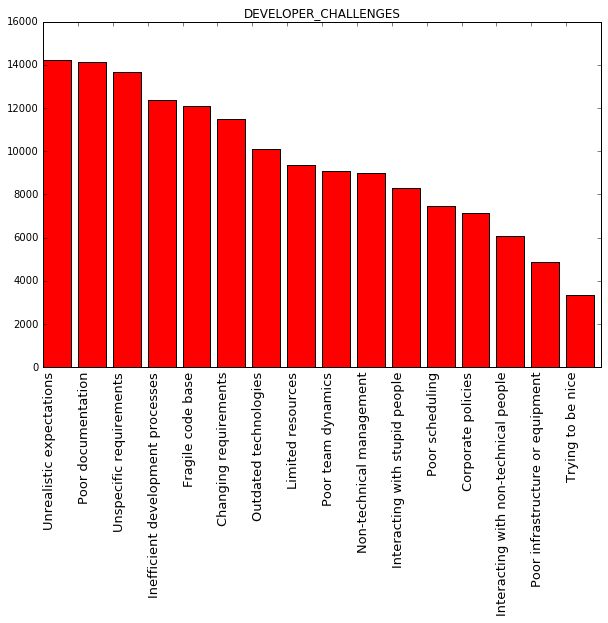

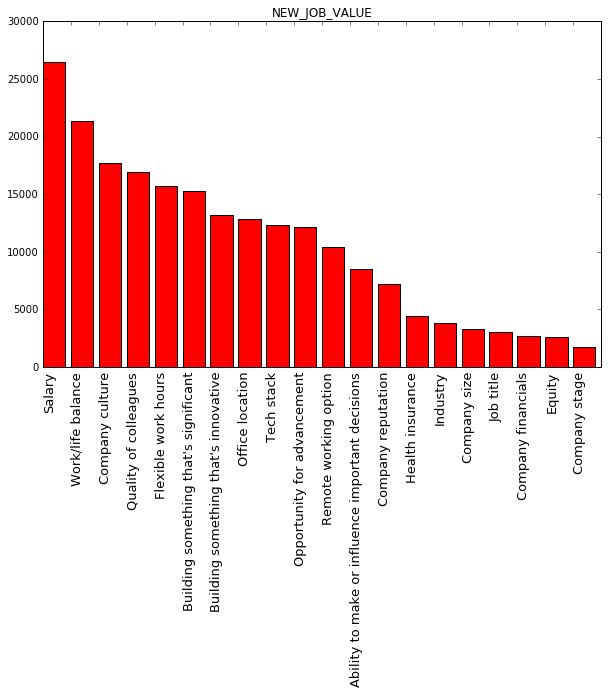

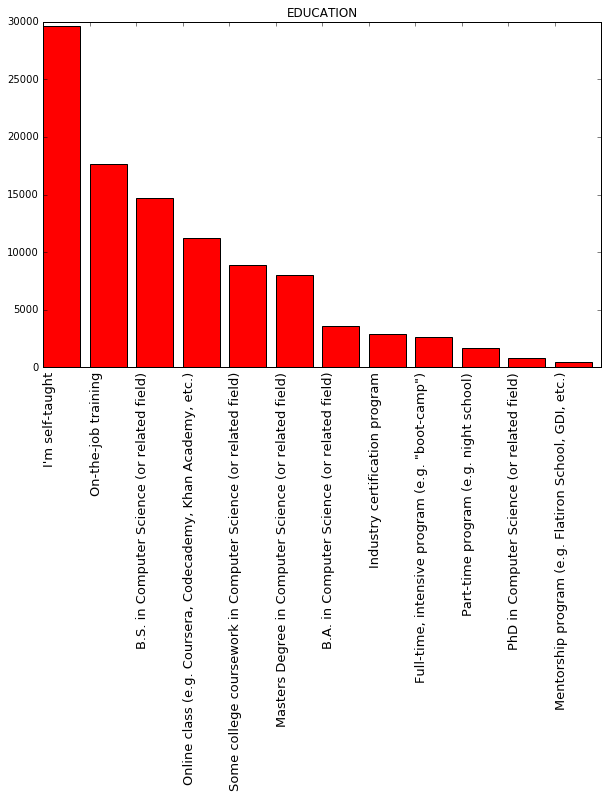

In [171]:
def class_name(objct):
    return objct.__class__.__name__

# make bar graphs
def plot_axes(df, column_name):
    if class_name(df) == 'DataFrame':
        binary_df_sum = convert_to_binary_columns(df, column_name).sum()
    elif class_name(df) == 'Series':
        binary_df_sum = df
        
    binary_df_sum.sort_values(inplace=True, 
                                 ascending=False,
                                 na_position='first')
    x = binary_df_sum.index
    y = binary_df_sum
    
    return x, y, column_name

def plot_binary_df((x, y, column_name)):
    ind = np.arange(len(y))

    pl.figure(figsize=(10,8))
    pl.title("{}".format(column_name.upper()))
    pl.bar(np.arange(len(x)),
           y.values,
           color='r',
           tick_label=list(x))
    pl.xticks(np.arange(len(x)), list(x), rotation='vertical', fontsize=13, horizontalalignment='left')
    pl.subplots_adjust(bottom=0.30)
    pl.show()

# plot bar graphs of each of the listed columns, using the functions above
print features.shape
for column in large_columns:
    sub_df = plot_binary_df((plot_axes(features, column)))

In [172]:
print "Feature columns:\n"
for col in cleaned_df.columns[:-1]:
    print col
    
print "\n\nLabel columns:\n"
print label.columns[0]

Feature columns:

age_range
experience_range
programming_ability
agree_loveboss
important_variety
important_control
important_promotion
important_newtech
important_companymission
important_buildexisting
important_buildnew
important_wfh
Changing requirements
Corporate policies
Fragile code base
Inefficient development processes
Interacting with non-technical people
Interacting with stupid people
Limited resources
Non-technical management
Outdated technologies
Poor documentation
Poor infrastructure or equipment
Poor scheduling
Poor team dynamics
Trying to be nice
Unrealistic expectations
Unspecific requirements
Ability to make or influence important decisions
Building something that's innovative
Building something that's significant
Company culture
Company financials
Company reputation
Company size
Company stage
Equity
Flexible work hours
Health insurance
Industry
Job title
Office location
Opportunity for advancement
Quality of colleagues
Remote working option
Salary
Tech stack
Work/life

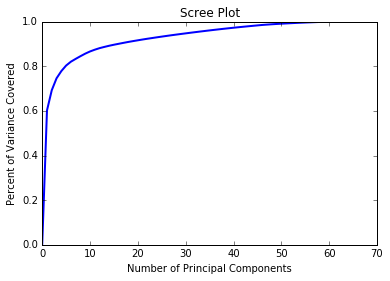

None
[ 0.60185708  0.69261979  0.7460048   0.77822669  0.80311311  0.82038109
  0.83303782  0.84504914  0.85645568  0.86623385  0.87418053  0.88111116
  0.88661711  0.89179928  0.89637693  0.90059995  0.90478919  0.90888727
  0.91260847  0.91623189  0.919817    0.92321549  0.9264398   0.92965469
  0.93276472  0.93582827  0.93883357  0.94170629  0.9445291   0.9473059
  0.95005619  0.95275989  0.95542172  0.95800272  0.96054622  0.9630687
  0.96551706  0.96789394  0.97023272  0.97250441  0.97471553  0.97684018
  0.97891277  0.98096634  0.98298299  0.9849591   0.98654873  0.98801533
  0.98937418  0.99061006  0.99178956  0.99288642  0.99394555  0.99498012
  0.99588568  0.99673576  0.99757027  0.99835444  0.99894535  0.99949948
  0.99981403  1.        ]


In [173]:
# use PCA to reduce the data into lower dimensions
from sklearn.decomposition import PCA


def feature_components_evr(feature_columns):
    pca = PCA(n_components=min(*imputed_features.shape))
    pca.fit(imputed_features)
    
    return pca.components_, pca.explained_variance_ratio_
    
    
def scree_plot(evr):
    """Used to determine the number of components to use for PCA"""
    evr = np.concatenate([[0], evr])
    cum_evr = np.cumsum(evr)
    
    pl.figure()
    pl.title("Scree Plot")
    pl.plot(cum_evr, lw=2, label="Cumulative Explained Variance Ratio")
    pl.xlabel("Number of Principal Components")
    pl.ylabel("Percent of Variance Covered")
    pl.show()

fce = feature_components_evr(imputed_features)

print scree_plot(fce[1])
print np.cumsum(fce[1])

## Based on the scree plot, above, I decided to use 3 principal components
To hypertune and modify the data later, I'll try it with 4 principal components

## Now, I'll scale and reduce the data. The data will only have the feature columns, leaving out the label column.
Before scaling, we need to take a look at the distribution of data for each column

Also, I'd like to analyze which features are correlated with each other 

In [174]:
from sklearn.preprocessing import StandardScaler

first_pc = feature_components_evr(imputed_features)[0][0]
second_pc = feature_components_evr(imputed_features)[0][1] 
third_pc = feature_components_evr(imputed_features)[0][2]
fourth_pc = feature_components_evr(imputed_features)[0][2]

cleaned_features = cleaned_df[cleaned_df.columns[:-1]]

# scale to a distribution with mean = 0 and sd = 1
# bad with data that isn't normally distributed, can be a problem with categorized data that turned into vectors
# might have to change the scaling method later
scaled_data = StandardScaler().fit_transform(cleaned_features)
# reduce data, using 4 principal components
reduced_data = PCA(n_components=4).fit_transform(cleaned_features)
# reduced and scaled
reduced_scaled_data = StandardScaler().fit_transform(reduced_data)

print "Original data: {} rows, {} columns".format(*cleaned_features.shape)
print "Scaled data: {} rows, {} columns".format(*scaled_data.shape)
print "Reduced data: {} rows, {} columns".format(*reduced_data.shape)
print "Reduced and scaled data: {} rows, {} columns".format(*reduced_scaled_data.shape)
print "First PC: {}".format(first_pc[:5])
print "Second PC: {}".format(second_pc[:5])
print "Third PC: {}".format(third_pc[:5])
print "Fourth PC: {}".format(fourth_pc[:5])

Original data: 42598 rows, 61 columns
Scaled data: 42598 rows, 61 columns
Reduced data: 42598 rows, 4 columns
Reduced and scaled data: 42598 rows, 4 columns
First PC: [ 0.01199231  0.00164477 -0.00900071 -0.00076862 -0.0007447 ]
Second PC: [-0.15129627  0.18298229 -0.9687508   0.0206873   0.00583719]
Third PC: [ 0.97916724 -0.04850988 -0.15909744  0.07082978  0.01154701]
Fourth PC: [ 0.97916724 -0.04850988 -0.15909744  0.07082978  0.01154701]


## Now, I'd like to visualize the reduced data and observe the principal components

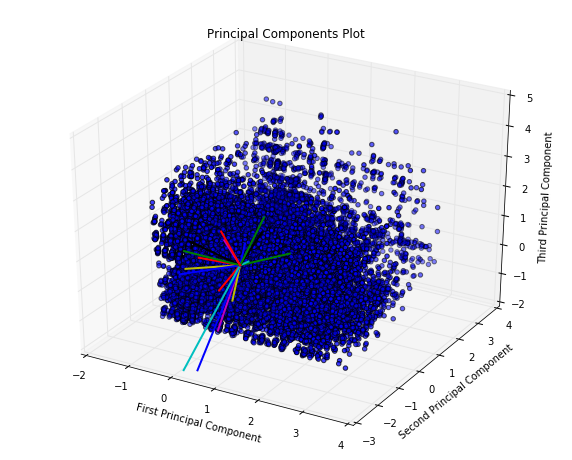

In [175]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.font_manager import FontProperties
%matplotlib inline


scaled_pca = PCA(n_components=3).fit(scaled_data)
first_scaled_pc = [x*10 for x in scaled_pca.components_[0]]
second_scaled_pc = [y*10 for y in scaled_pca.components_[1]]
third_scaled_pc = [z*10 for z in scaled_pca.components_[2]]

scaled_pcs = [first_scaled_pc, second_scaled_pc, third_scaled_pc]

# plot in 3d
def plot_pc_data(features, scaled_pcs):
    x = features[:, 0]
    y = features[:, 1]
    z = features[:, 2]
    
    fig = pl.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title("Principal Components Plot")
    
    # plotting data points
    ax.scatter(x, y, z, 'k.')
    # plotting pc vectors
    for i, j in enumerate(original.columns):
        ax.plot(xs=[0, scaled_pcs[0][i]], ys=[0, scaled_pcs[1][i]], zs=[0, scaled_pcs[2][i] ], lw=2, label=j)
#         ax.annotate(range(0, len(original.columns)), 
#                     (scaled_pcs[0][i], scaled_pcs[1][i], scaled_pcs[2][i]), 
#                     label=j, markersize=2)
        
    ax.set_xlabel("First Principal Component")
    ax.set_ylabel("Second Principal Component")
    ax.set_zlabel("Third Principal Component")
    
    ax.auto_scale_xyz(x, y, z)
    pl.show()

# use data reduced down to three dimensions
plot_pc_data(reduced_scaled_data, scaled_pcs)

In [176]:
max(*cleaned_df.shape)

42598

# Cross Validation

In [177]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier

X = cleaned_df[cleaned_df.columns[:-1]]
y = cleaned_df[cleaned_df.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

scorer = make_scorer(f1_score, pos_label=1)
cv_algo = KFold(n=max(*cleaned_df.shape), n_folds=10, shuffle=True, random_state=12)

cvs = cross_val_score(estimator=RandomForestClassifier(),
                      X=X.as_matrix(),
                      y=y,
                      scoring=scorer,
                      cv=cv_algo)

print cvs.mean()

0.857913729853


# Classification

In [178]:
# features, pd.DataFrame(label)
from sklearn.svm import SVC

clf = SVC(C=0.1, gamma=0.1)

t1 = time.time()
clf.fit(X_train, y_train)
t2 = time.time()

pred = clf.predict(X_test)
t3 = time.time()

print "Training time: {}".format(t2 - t1)
print "Prediction time: {}".format(t3 - t2)
print "F1 Score: {}".format(f1_score(y_test, pred))

Training time: 312.402846098
Prediction time: 21.3725130558
F1 Score: 0.880714661061


# The following GridSearchCV algorithm will take up to 30 minutes to run

It's not necessary to run, as it will yield the same f1 score as the classifier above.

In [674]:
# # I'd like to explore the parameter combinations of the svm classifier to analyze any significant increase in the F1 score
# from sklearn.grid_search import GridSearchCV
# from sklearn.metrics import make_scorer

# scorer = make_scorer(f1_score)
# params = {'C': [0.1*c for c in range(1,3)],
#           'gamma': [0.1*g for g in range(1,5)]}

# clf = SVC()
# clf.fit(X_train, y_train)

# gs_svm = GridSearchCV(clf, param_grid=params, scoring=scorer)
# # must fit 
# gs_svm.fit(features, label[label.columns[-1]])

# print gs_svm.best_estimator_
# print gs_svm.best_score_
# print gs_svm.best_params_

# The classifier is working way too well, with an f1 score of .999

I'm going to fit the data with a decision tree and check which features have been 

In [179]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

rfc = RandomForestClassifier()
xrfc = ExtraTreesClassifier()

t1 = time.time()
rfc.fit(X_train, y_train)
t2 = time.time()

rfc_pred = rfc.predict(X_test)
t3 = time.time()

xrfc.fit(X_train, y_train)
t4 = time.time()

xrfc_pred = xrfc.predict(X_test)
t5 = time.time()

rfc_f1 = f1_score(y_test, rfc_pred)
xrfc_f1 = f1_score(y_test, xrfc_pred)

print "Training time: {}".format(t2 - t1)
print "Prediction time: {}".format(t3 - t2)
print "F1 Score: {}\n".format(rfc_f1)
print "Training time: {}".format(t4 - t3)
print "Predictino time: {}".format(t5 - t4)
print "F1 Score (ExtraTrees): {}".format(xrfc_f1)

Training time: 0.504117012024
Prediction time: 0.0270259380341
F1 Score: 0.859099398215

Training time: 0.64519906044
Predictino time: 0.0301699638367
F1 Score (ExtraTrees): 0.860073463164


In [217]:
# from sklearn.naive_bayes import MultinomialNB

# mnb = MultinomialNB()

# mnb.fit(X_train, y_train)

# nb_pred = mnb.predict(X_test)

# f1_nb = f1_score(y_test, nb_pred)

# print f1_nb

cleaned_df[cleaned_df.columns].groupby(cleaned_df[cleaned_df.columns]).count()

ValueError: Grouper for '<class 'pandas.core.frame.DataFrame'>' not 1-dimensional

## Random Forests is a lot quicker. I'd like to hypertune the parameters and try to beat the svm classifier's score

In [214]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

# param ranges were narrowed down from original, but still within range of the best estimator,
# in order to reduce gridsearch algorithm running time
a = time.time()
params = {'n_estimators': range(10, 15),
          'criterion': ['gini', 'entropy'],
          'min_samples_split': range(1, 5),
          'min_samples_leaf': range(5, 10)}
scorer = make_scorer(f1_score, pos_label=1)
est = RandomForestClassifier()
est.fit(X_train, y_train)

gs = GridSearchCV(est, param_grid=params, scoring=scorer)
gs.fit(X, y)

print gs.best_estimator_
print gs.best_score_
print gs.best_params_
print "Running time: {}".format(time.time() - a)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=7, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.880906254907
{'min_samples_split': 2, 'n_estimators': 10, 'criterion': 'gini', 'min_samples_leaf': 7}
Running time: 293.549283028


In [251]:
# input the optimal parameters into the classifier
rfc = RandomForestClassifier(min_samples_split=2, 
                             n_estimators=10, 
                             criterion='gini', 
                             min_samples_leaf=7)

t1 = time.time()
rfc.fit(X_train, y_train)
t2 = time.time()
hypertuned_rfc_pred = rfc.predict(X_test)
t3 = time.time()

rfc_f1 = f1_score(y_test, hypertuned_rfc_pred, pos_label=1)
print "Training time for {}: {}".format(class_name(rfc), t3 - t2)
print "Prediction time: {}".format(t2 - t1)
print "F1 Score: {}".format(rfc_f1)

# analyze the most important features that help make the best predictions
rfc_fi_ = pd.Series(rfc.feature_importances_, index=X.columns)
rfc_fi_ = rfc_fi_.sort_values(ascending=False)

Training time for RandomForestClassifier: 0.017627954483
Prediction time: 0.403352022171
F1 Score: 0.879814385151


In [239]:
all_scores = []
for i in range(0, 20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    rfc = RandomForestClassifier(min_samples_split=1, 
                                 n_estimators=13, 
                                 criterion='entropy', 
                                 min_samples_leaf=7)

    rfc.fit(X_train, y_train)
    pred = rfc.predict(X_test)
    f1 = f1_score(y_test, pred)
    all_scores.append(f1)
    
print "Stats of 20 samples:"
print "Mean: {}".format(np.mean(all_scores))
print "Standard Deviation: {}".format(np.std(all_scores))

Stats of 20 samples:
Mean: 0.881084845241
Standard Deviation: 0.00260946917657


I ran into the problem that the classifier had a low recall for the positive and negative scores. It had a very high precision.

[[ 0.959  0.096]
 [ 0.265  0.025]]
0.999873491998
Confusion Matrices for RF, hypertuned-RF, and SVM, respectively


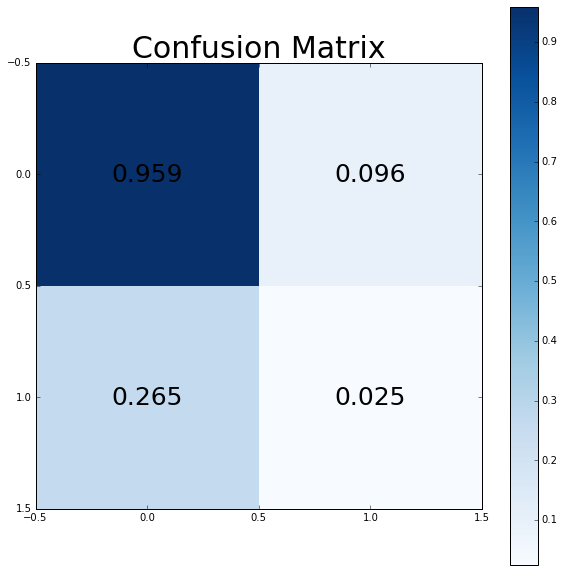

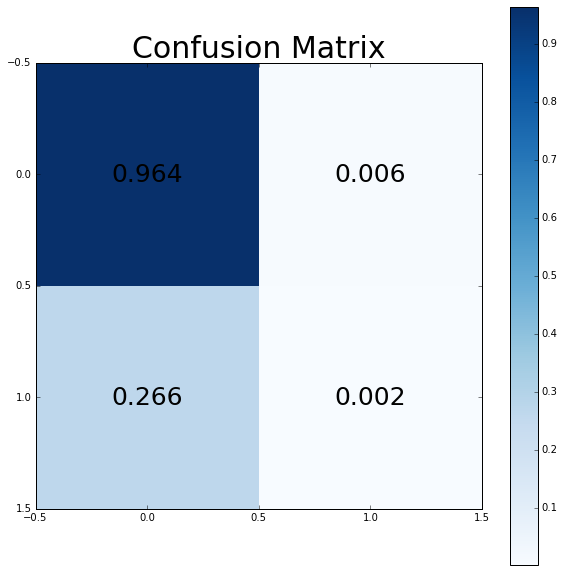

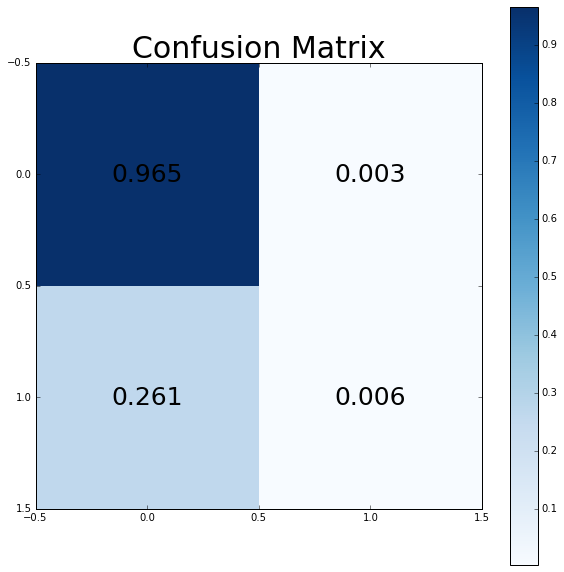

In [194]:
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from numpy.linalg import norm
%matplotlib inline

# copied and pasted then modded from stackoverflow question to obtain
def perf_measure(y_actual, y_hat):
    tp = 0
    fp = 0
    fn = 0
    tn = 0
    
    for i in range(len(y_hat)):
        if y_actual[i][0] == y_hat[i] == 1:
            tp += 1
        elif y_actual[i][0] == 1 and y_actual[i][0] != y_hat[i]:
            fp += 1
        elif y_actual[i][0] == 0 and y_actual[i][0] != y_hat[i]:
            fn += 1
        elif y_actual[i][0] == y_hat[i] == 0:
            tn += 1
            
    return (tp, fp, fn, tn)


def normalized_confusion_matrix(cm):
    total = norm(cm)
    result = cm.tolist()
    
    row = 0
    for row_elements in cm:
        col = 0
        for col_element in row_elements:
            result[row][col] = round(float(col_element) / float(total), 3)
            col += 1
        row += 1
        
    return np.array(result)


cm_rf = normalized_confusion_matrix(confusion_matrix(y_test, rfc_pred, labels=[1, 0]))
cm_rf_ht = normalized_confusion_matrix(confusion_matrix(y_test, hypertuned_rfc_pred, labels=[1, 0]))
cm_svm = normalized_confusion_matrix(confusion_matrix(y_test, pred, labels=[1, 0]))
# cm_nb = normalized_confusion_matrix(confusion_matrix(y_test, nb_pred, labels=[1, 0]))

print cm_rf
print norm(cm_rf)


def plot_confusion_matrix(cm, cmap=pl.cm.Blues):
    pl.figure(figsize=(10, 10))
    pl.imshow(cm, interpolation='nearest', cmap=cmap)
    pl.title("Confusion Matrix")
    pl.colorbar()
    pl.title("Confusion Matrix", size=30)
    for x in range(0,2):
        for y in range(0, 2):
            pl.annotate(str(cm[x][y]), xy = (y, x),
                        horizontalalignment='center', 
                        verticalalignment='center',
                        size=25)

print "Confusion Matrices for RF, hypertuned-RF, and SVM, respectively"
plot_confusion_matrix(cm_rf)
plot_confusion_matrix(cm_rf_ht)
plot_confusion_matrix(cm_svm)
# plot_confusion_matrix(cm_nb)

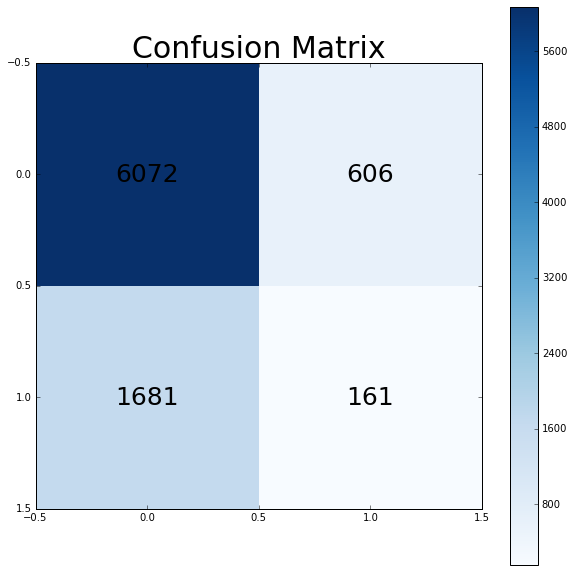

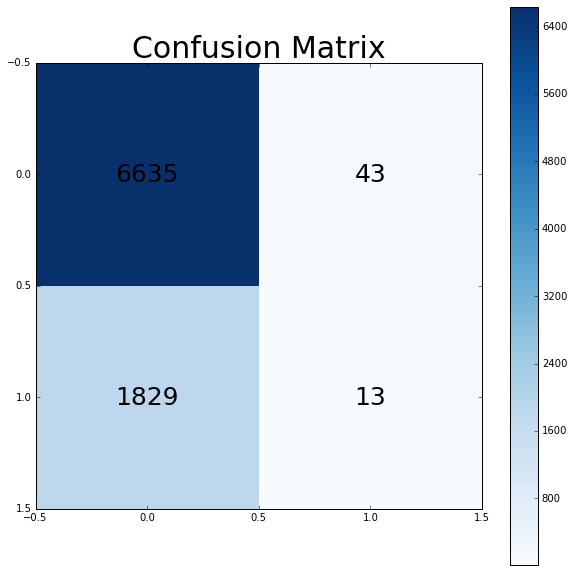

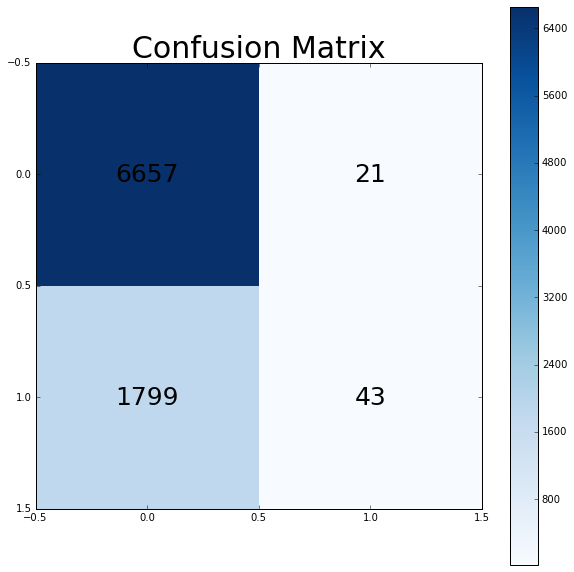

In [195]:
plot_confusion_matrix(confusion_matrix(y_test, rfc_pred, labels=[1, 0]))
plot_confusion_matrix(confusion_matrix(y_test, hypertuned_rfc_pred, labels=[1, 0]))
plot_confusion_matrix(confusion_matrix(y_test, pred, labels=[1, 0]))
# plot_confusion_matrix(confusion_matrix(y_test, nb_pred, labels=[1, 0]))

In [676]:
# Create graph of ROC curve
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

fpr = dict()
tpr = dict()
roc_auc = dict()

clf = OneVsRestClassifier(SVC(C=0.1, gamma=0.1))
y_score = clf.fit(X_train, y_train).decision_function(X_test)



for i in range(0, 2):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


##############################################################################
# Plot ROC curves for the multiclass problem

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         linewidth=2)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         linewidth=2)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

TypeError: unhashable type

In [591]:
binary_clf = {}

for i in y_test[y_test.columns[-1]]:
    if i not in binary_clf:
        binary_clf[i] = 1
    else:
        binary_clf[i] += 1

print binary_clf

print float(1531) / (1531+5709)

AttributeError: 'Series' object has no attribute 'columns'

In [252]:
from sklearn.metrics import classification_report

print "Random Forest:"
print classification_report(y_test, rfc_pred, labels=[1, 0])
print cm_rf
print "\nRandom Forest Hypertuned:"
print classification_report(y_test, hypertuned_rfc_pred, labels=[1, 0])
print cm_rf_ht
print "\nSupport Vector Machine:"
print classification_report(y_test, pred, labels=[1, 0])
print cm_svm

Random Forest:
             precision    recall  f1-score   support

          1       0.78      0.91      0.84      6678
          0       0.21      0.09      0.12      1842

avg / total       0.66      0.73      0.69      8520

[[ 0.959  0.096]
 [ 0.265  0.025]]

Random Forest Hypertuned:
             precision    recall  f1-score   support

          1       0.79      0.99      0.88      6678
          0       0.63      0.04      0.07      1842

avg / total       0.75      0.79      0.71      8520

[[ 0.964  0.006]
 [ 0.266  0.002]]

Support Vector Machine:
             precision    recall  f1-score   support

          1       0.79      1.00      0.88      6678
          0       0.63      0.02      0.03      1842

avg / total       0.75      0.79      0.70      8520

[[ 0.965  0.003]
 [ 0.261  0.006]]


In [253]:
print "Feature importances:\n\n{}".format(rfc_fi_[:10])

Feature importances:

agree_loveboss              0.101495
occupation                  0.060599
programming_ability         0.046147
age_range                   0.045835
experience_range            0.036881
important_wfh               0.031748
important_promotion         0.030269
important_companymission    0.028429
important_control           0.027544
important_newtech           0.026087
dtype: float64


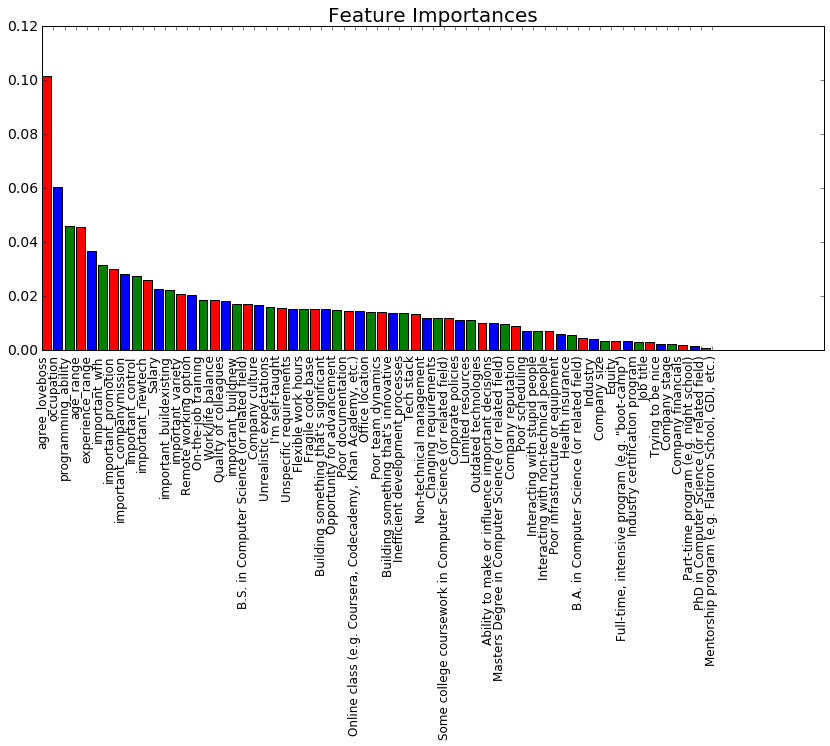

In [288]:
# plotting feature importances in descending order
pl.figure(figsize=(14, 6))
pl.title("Feature Importances", size=20)
pl.bar(np.arange(len(rfc_fi_.index)),
       rfc_fi_.values,
       color=('red', 'blue', 'green'),
       tick_label=list(rfc_fi_.index))
pl.xticks(np.arange(len(rfc_fi_.index)), list(rfc_fi_.index), rotation='vertical', fontsize=12)
pl.yticks(size=14)
pl.subplots_adjust(bottom=.15)

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)
params = {'booster': 'gbtree', 'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }

tree_booster_params = {'eta': 1, 'gamma': 1, 'min_child_weight': 1, 'max_depth': 3}
watchlist  = [(dtest,'eval'), (dtrain,'train')]

num_round = 3
bst = xgb.train(params, dtrain, num_boost_round=num_round)
preds = bst.predict(dtest)
labels = dtest.get_label()

print sorted(bst.get_fscore().items(), key=lambda t: -t[1])
print ('error=%f' % ( sum(1 for i in range(len(preds)) if int(preds[i]>0.5)!=labels[i]) /float(len(preds))))

# dtrain.feature_names

# help('xgboost.DMatrix')

In [308]:
# Here, I'd like to visualize the number of different answers for each column
# I'd like to make a subplot for each column after cleaning, and look at the data by frequency
cols = df.columns
total_cols = len(cols)

col_data_dict = {}
# leaving out cols[0] because it is an ID column
for col, data in df[cols[1:]].iteritems():
    print df[col].groupby(df[col]).count()

collector
Facebook                     9811
House ads                    8633
Meta Stack Overflow Post    28177
Miscellaneous                 108
Reddit                       6226
Twitter                      3075
dtype: int64
country
Afghanistan                48
Albania                    34
Algeria                    38
Andorra                    12
Angola                     10
Antarctica                  1
Antigua & Deps              2
Argentina                 362
Armenia                    35
Australia                1117
Austria                   482
Azerbaijan                 29
Bahamas                     7
Bahrain                    11
Bangladesh                166
Barbados                    3
Belarus                   164
Belgium                   543
Belize                      2
Benin                       2
Bermuda                     2
Bhutan                      2
Bolivia                    15
Bosnia Herzegovina         54
Botswana                    4
Brazil         

## The following columns need to be broken down:

'self_identification'

'tech_do'

'tech_want'

'dev_environment'

'education'

'new_job_value'

'how_to_improve_interview_process'

'developer_challenges'

'why_stack_overflow'

## Removing NaN entries
There are multiple ways to remove NaN entries.
One way to remove NaN values is with the .dropna() function. However, this function can remove too many values, so I looked at the percentage decrease of data by using this function. The sklearn.preprocessing.Imputer function won't work for the label column.

In [37]:
# we'll break down education and take a look at it here
def plot_axes(df, column_name):
    if df.__class__.__name__ == 'DataFrame':
        bernoulli_df_sum = convert_to_bernoulli_columns(df, column_name).sum()
    elif df.__class__.__name__ == 'Series':
        bernoulli_df_sum = df
        
    bernoulli_df_sum.sort_values(inplace=True, 
                                 ascending=False,
                                 na_position='first')
    x = bernoulli_df_sum.index
    y = bernoulli_df_sum
    
    return x, y, column_name

def plot_bernoulli_df((x, y, column_name)):
    
    ind = np.arange(len(y))

    pl.figure(figsize=(10,8))
    pl.title("{}".format(column_name.upper()))
    pl.bar(np.arange(len(x)),
           y.values,
           color='r',
           tick_label=list(x))
    pl.xticks(np.arange(len(x)), list(x), rotation='vertical')
    pl.subplots_adjust(bottom=0.15)
    pl.show()
    
edu_sum = convert_to_binary_columns(df, 'education').sum()

## Need to recombine the expanded columns into the original dataset

The original dataset should have (12 + 42 + 42 + 23 + 12 + 20 + 9 + 16 + 10 - 9) more columns.

In [11]:
edu_df = convert_to_bernoulli_columns(df, 'education')

In [186]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.mixture import GMM

pipe_lr = Pipeline([("scl", StandardScaler()),
                    ("pca", PCA()),
                    ("gmm", GMM())
                ])

pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, n_components=None, whiten=False)), ('gmm', GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=1, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0))])

In [190]:
# Reduce the data into the necessary amount of dimensions
# Scale the data to find a correlation among the variables
pipe_lr.score(X_test, y_test)

array([-80.89847253, -74.32967353, -71.61493557, ..., -76.54780089,
       -90.40464955, -70.81135511])

# The Target/Label column(s)

First, we have to categorize the target column(s):

Is it a single column or multiple columns?

Is it a classification or regression?


In [87]:
# for the target column we need to vectorize it
# the target column is also

sw_vs_st = df['star_wars_vs_star_trek']


def transform_labels(target_col):
    le = LabelEncoder()
    le.fit(target_col)
    return le.transform(target_col)


def transform_labels_except_nan(target_col):
    print target_col.shape
    mapper = {"Star Wars": 1,
              "Star Trek": 2,
              "Star Wars; Star Trek": 3}
    
    target_col = target_col.map(mapper)
    print target_col.shape
    return target_col

vectorized_target_col = transform_labels(sw_vs_st)

imr = Imputer(missing_values=0, strategy="median", axis=1)
vectorized_target_col = imr.fit_transform(vectorized_target_col)
vectorized_target_col = vectorized_target_col[0]
vectorized_target_col = pd.DataFrame(vectorized_target_col)

/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [88]:
# Merge feature and label columns
edu_sw_st = pd.concat([edu_df, vectorized_target_col], axis=1)
edu_sw_st = edu_sw_st.dropna()

## How do we deal with NaN entries and multiclass labels?

In [198]:
# Let's test an ML algorithm to predict the language a person is using, based on the dev environment
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# I'm using SVM because it is still effective with a high number of features, sometimes even when the number of features
# is greater than the number of samples
# Use Random Forests
# Use Gradient Boosting

# X = edu_sw_st[edu_sw_st.columns[:min(*edu_sw_st.shape) - 1]]
# y = edu_sw_st[edu_sw_st.columns[-1]]

def train_clf(clf, X_train, y_train):
    a = time.time()
    clf.fit(X_train, y_train)
    b = time.time()
    
    print "Training time for {}: {}".format(clf.__class__.__name__, b - a)


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# clf = SVC(kernel='poly',
#           degree=4,
#           gamma=0.3,
#           C=)

# train_clf(clf, X_train, y_train)

In [212]:
def prediction(clf, X_test, y_test):
    a = time.time()
    pred = clf.predict(X_test)
    b = time.time()
    print "Prediction time in seconds: {}".format(b - a)
    return f1_score(y_test, pred)

prediction(clf, X_test, y_test)

Prediction time in seconds: 0.360489845276


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


1.0

In [115]:
from sklearn.cross_validation import StratifiedKFold
skf = StratifiedKFold(y, n_folds=5)

In [135]:
train_indices, test_indices = next(iter(skf))

X_train, y_train = X.iloc[train_indices], y[train_indices]
X_test, y_test = X.iloc[test_indices], y[test_indices]

clf = SVC()

train_clf(clf, X_train, y_train)


Training time for SVC: 63.1962859631


In [137]:
prediction(clf, X_test, y_test)

Prediction time in seconds: 3.62956309319


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


0.6918835503435915

In [152]:
# Let's try KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

params = {'n_neighbors': range(5, 11),
          'weights': ['distance'],
          'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
scorer = make_scorer(f1_score)
knc = KNeighborsClassifier()
gs = GridSearchCV(estimator=knc, 
                  param_grid=params,
                  scoring=scorer)
c = time.time()
gs.fit(X, y)
print "Grid Search time in seconds: {}".format(time.time() - c)

/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of sco

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10], 'weights': ['distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
       pre_dispatch='2*n_jobs', refit=True, scoring=make_scorer(f1_score),
       verbose=0)

## The prediction resulted worse than expected.

First: I'll see if there's a more appropriate metric, other than f1_score

Second: I'll need to first check if the parameters need tuning


In [304]:
from sklearn.cross_validation import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

pipe_lr = Pipeline(['scl', StandardScaler(),
                   'clf', SVC()])
pipe_lr.fit(X_train, y_train)
pipe_lr.score(X_test, y_test)


# skf = KFold(max(*X.shape), n_folds=5, shuffle=True, random_state=12)
# for train, test in skf:
#     print train, test

TypeError: zip argument #2 must support iteration

In [106]:
# problem: Target column includes 4 answers: SW, ST, SW+ST, NaN
# prediction Needs to either be binary or multivariable
